# Глава 2  
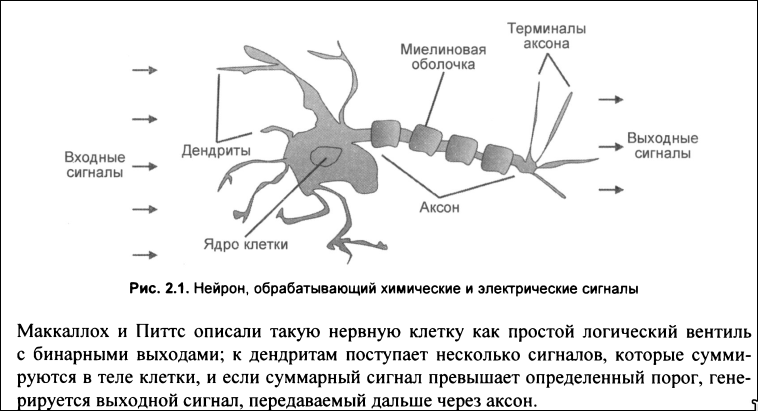  

Мы можем рассмотреть концепцию персетрона на примере бинарной классификации: $z = \sum{w_i * x_i}$  
$$
\sigma(z) = 
\begin{cases} 
1 & \text{если } z \geq \theta \\
0 & \text{в ином случае}
\end{cases}
$$  
$w_j:=w_j + \triangle{w}$  
$\triangle{w_j} = \eta(y^{i} - \hat{y}^{i})*x^{i}_j$  
Сходится только в линейно разделимом случае)  
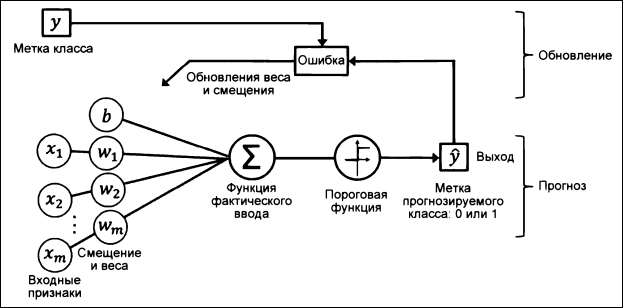  


In [1]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.head()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

In [2]:
import numpy as np

In [3]:
X = df.drop(columns=[4])[:100].values
Y = df[4][:100]
Y = np.where(Y == Y[0], 1, 0)

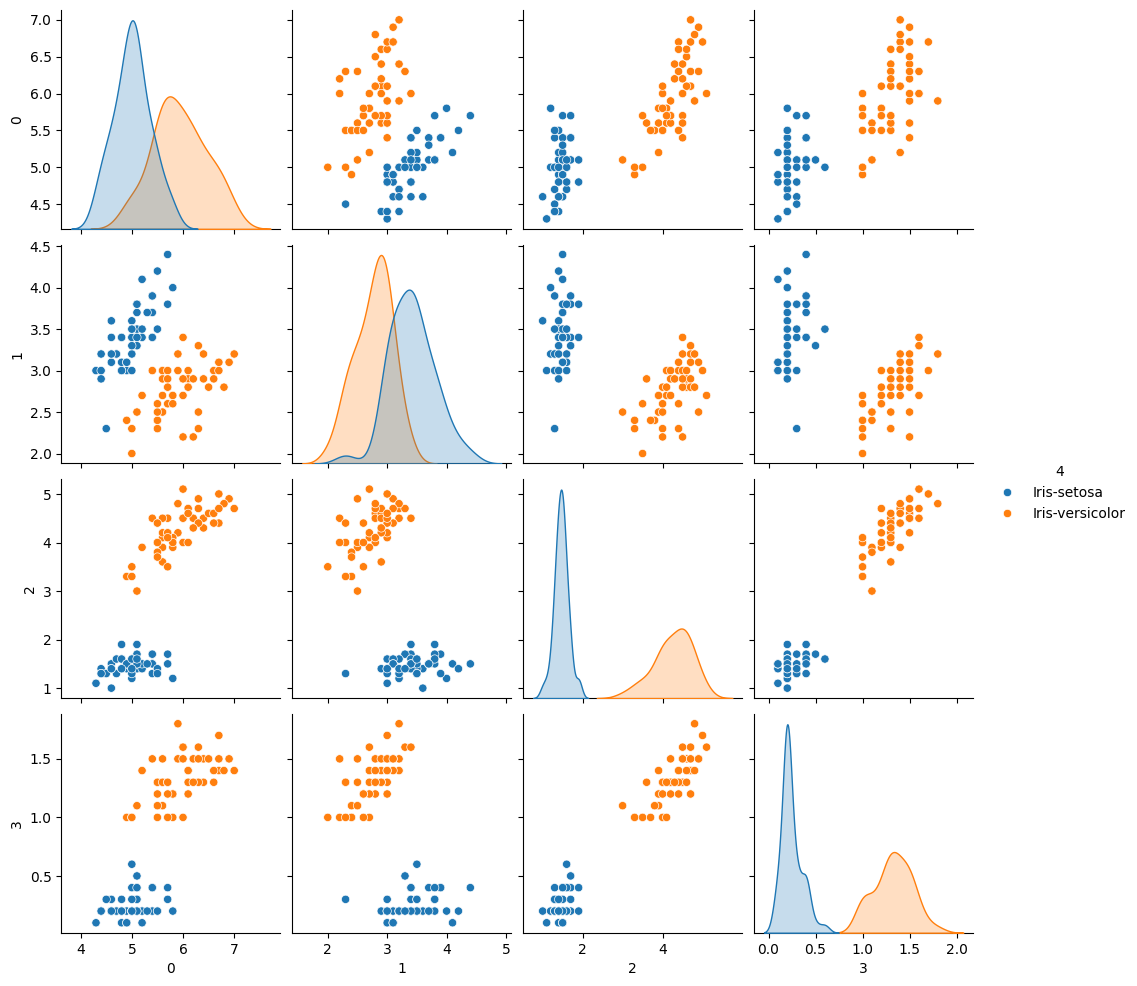

In [4]:
import seaborn as sns
sns.pairplot(
    hue=4,
    data=df[:100],
    vars=[0, 1, 2, 3]
)

In [5]:
class my_Perceptrot:

    def __init__(self, eta=0.01, n_epoch = 50, random_seed = 1):
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_seed = random_seed

    def fit(self, X, Y):
        # X = np.concat([X, np.ones(shape=(X.shape[0], 1))], axis=1) # add b
        self.rs_ = np.random.RandomState(self.random_seed)
        self.w_ = self.rs_.normal(loc=0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []
        for _ in range(self.n_epoch):
            error = 0
            for x, y in zip(X, Y):
                delta = (y - self.predict(x))
                self.w_ += self.eta * delta * x
                self.b_ += self.eta * delta
                error += int(delta != 0.0)
            self.errors_.append(error)

        return self

    def net_input(self, x):
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        # print(self.w_.shape)
        return np.where(self.net_input(x) >= 0.0, 1, 0)


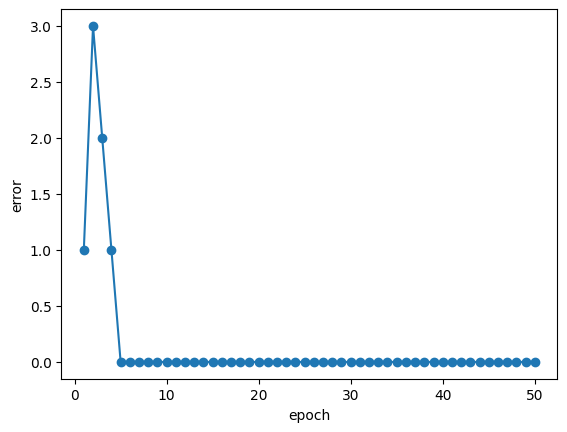

In [6]:
import matplotlib.pyplot as plt
cl = my_Perceptrot()
cl.fit(X, Y)
plt.plot(np.arange(1, len(cl.errors_) + 1), cl.errors_, marker='o')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

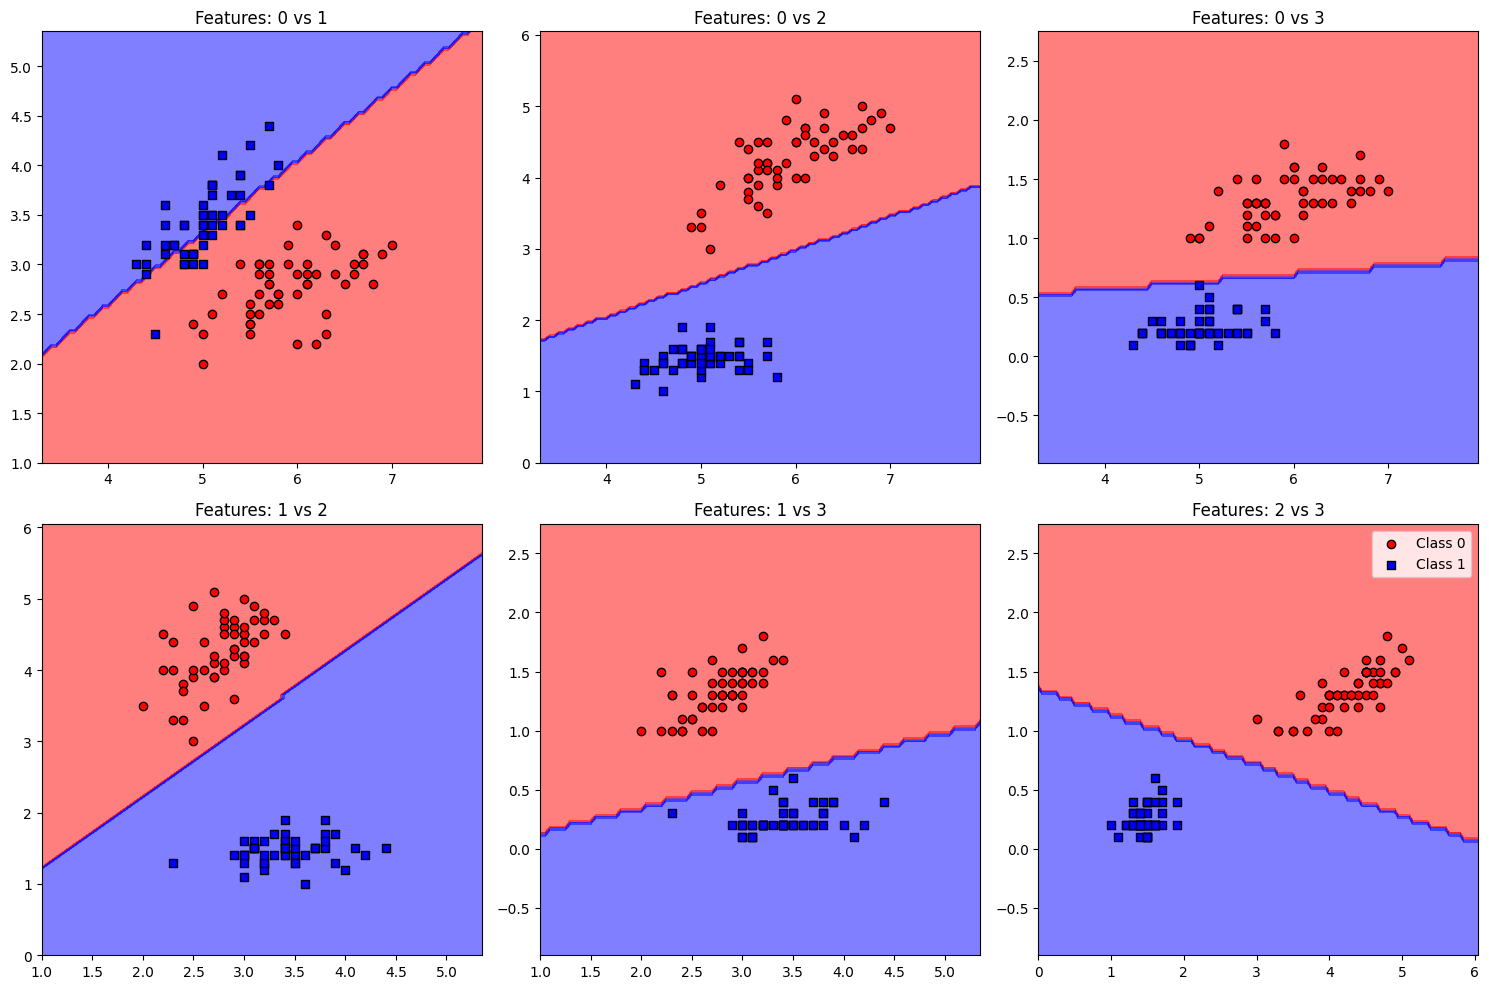

In [7]:
from matplotlib.colors import ListedColormap
from itertools import combinations
from math import sqrt
def plot_decision_regions(classifier, X, Y, resolution=0.05):
    combs = list(combinations(np.arange(X.shape[1]), 2))
    markers = ('o', 's', '^', 'v', '<', 'x', 'w')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    k = len(combs) // 3
    # print(len(combs))

    fig, axes = plt.subplots(k, 3, figsize=(15, 10))
    for i in range(len(combs)):
        idx1 = combs[i][0]
        idx2 = combs[i][1]
        xx1_min, xx1_max = X[:, idx1].min() - 1, X[:, idx1].max() + 1
        xx2_min, xx2_max = X[:, idx2].min() - 1, X[:, idx2].max() + 1
        # print(xx1_min, xx1_max, xx2_min, xx2_max)
        xx1, xx2 = np.meshgrid(np.arange(xx1_min, xx1_max, resolution),
                               np.arange(xx2_min, xx2_max, resolution))
        cl = classifier()
        cl.fit(X[:, [idx1, idx2]], Y)
        xxx = np.array([xx1.ravel(), xx2.ravel()])
        lab = cl.predict(xxx.T)
        lab = lab.reshape(xx2.shape)
        axes[i//3, i%3].contourf(xx1, xx2, lab, alpha=0.5, cmap=cmap)
        axes[i//3, i%3].set_xlim(xx1.min(), xx1.max())
        axes[i//3, i%3].set_ylim(xx2.min(), xx2.max())
        axes[i//3, i%3].set_title(f'Features: {idx1} vs {idx2}')
        for idx, yi in enumerate(np.unique(Y)):
            axes[i//3, i%3].scatter(x=X[Y == yi, idx1],
                    y=X[Y == yi, idx2],
                    alpha=1,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {yi}',
                    edgecolor='black')
    plt.tight_layout()
    plt.legend()
    plt.show()


plot_decision_regions(my_Perceptrot, X, Y)

In [8]:
class my_AdalineGD:
    def __init__(self, eta=0.01, n_epoch=50, random_seed=1):
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_seed = random_seed

    def fit(self, X, Y):
        # Loss - MSE, why? i dont know...
        self.rs_ = np.random.RandomState(self.random_seed)
        self.w_ = self.rs_.normal(loc=0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []
        for _ in range(self.n_epoch):
            error = (Y - self.activation(X))
            self.w_ += self.eta * 2.0 * np.dot(error, X) / X.shape[0]
            self.b_ += self.eta * 2.0 * error.mean()
            self.errors_.append(error**2)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.5, 1, 0)


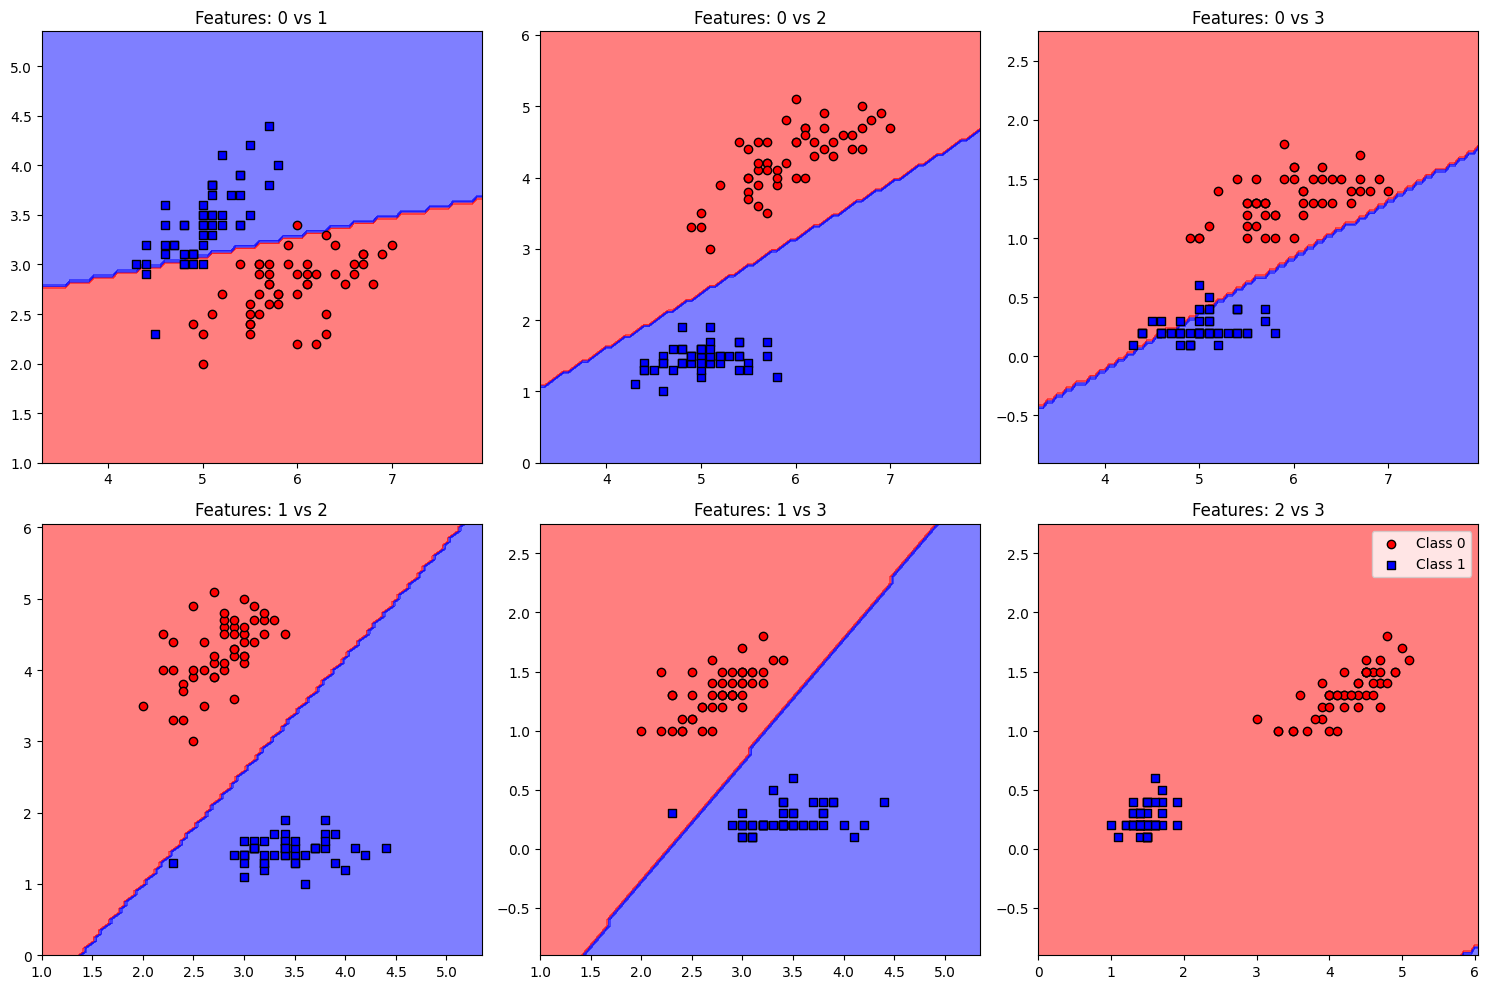

In [9]:
plot_decision_regions(my_AdalineGD, X, Y)

In [10]:
class my_AdalineSGD:
    def __init__(self, eta=0.01, n_epoch=50, random_seed=1, is_shuffle = True):
        self.eta = eta
        self.n_epoch = n_epoch
        self.rs_ = np.random.RandomState(random_seed)
        self.is_shuffle = is_shuffle
        self.w_initialized = False

    def fit(self, X, Y):
        if (not self.w_initialized):
            self.w_initialize(X.shape[1])
        loss = []
        for _ in range(self.n_epoch):
            errors_per_epoch = 0
            if self.is_shuffle:
                X, Y = self._shuffle(X, Y)
            for x, y in zip(X, Y):
                errors_per_epoch += self.update_weights(x, y)
            errors_per_epoch /= X.shape[0]
            loss.append(errors_per_epoch)
        return self

    def partial_fit(self, X, Y):
        if (not self.w_initialized):
            self.w_initialize(X.shape[1])
        if (Y.ravel().shape[0] > 1):
            if self.is_shuffle:
                X, Y = self._shuffle(X, Y)
            for x, y in zip(X, Y):
                errors_per_epoch += self.update_weights(x, y)
        else:
            self.update_weights(X, Y)
        return self



    def update_weights(self, xi, yi):
        error = (yi - self.activation(xi))
        self.w_ += self.eta * 2.0 * error * xi
        self.b_ += self.eta * 2.0 * error
        return error**2

    def w_initialize(self, m):
        self.w_ = self.rs_.normal(loc=0, scale=0.01, size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True
        return self

    def _shuffle(self, X, y):
        r = self.rs_.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.5, 1, 0)


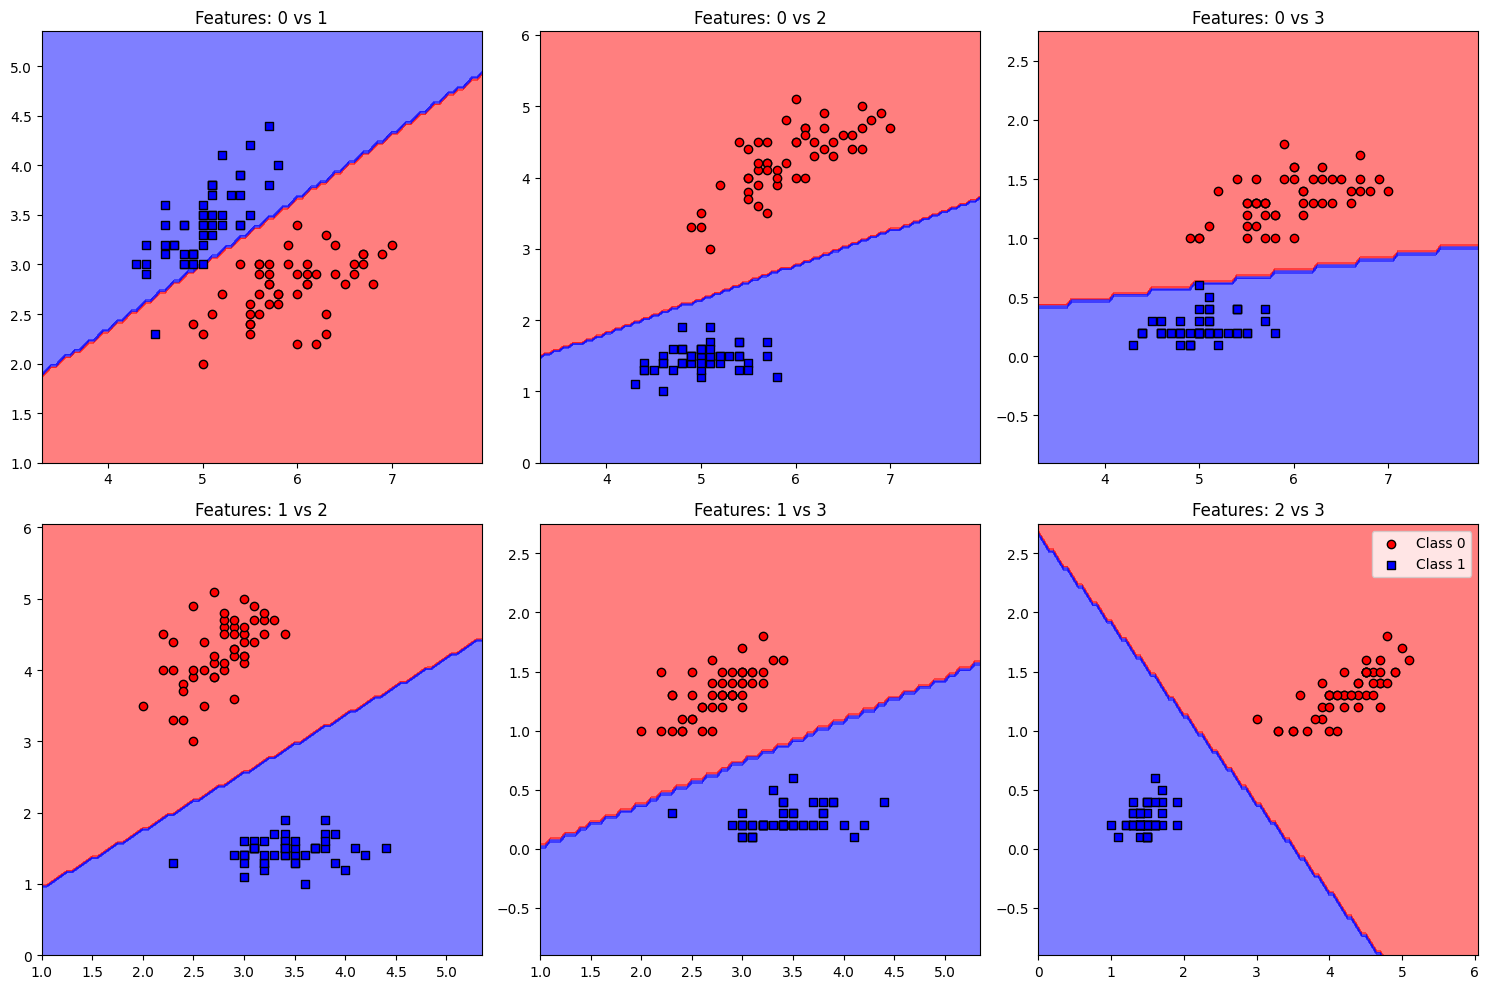

In [11]:
plot_decision_regions(my_AdalineSGD, X, Y)

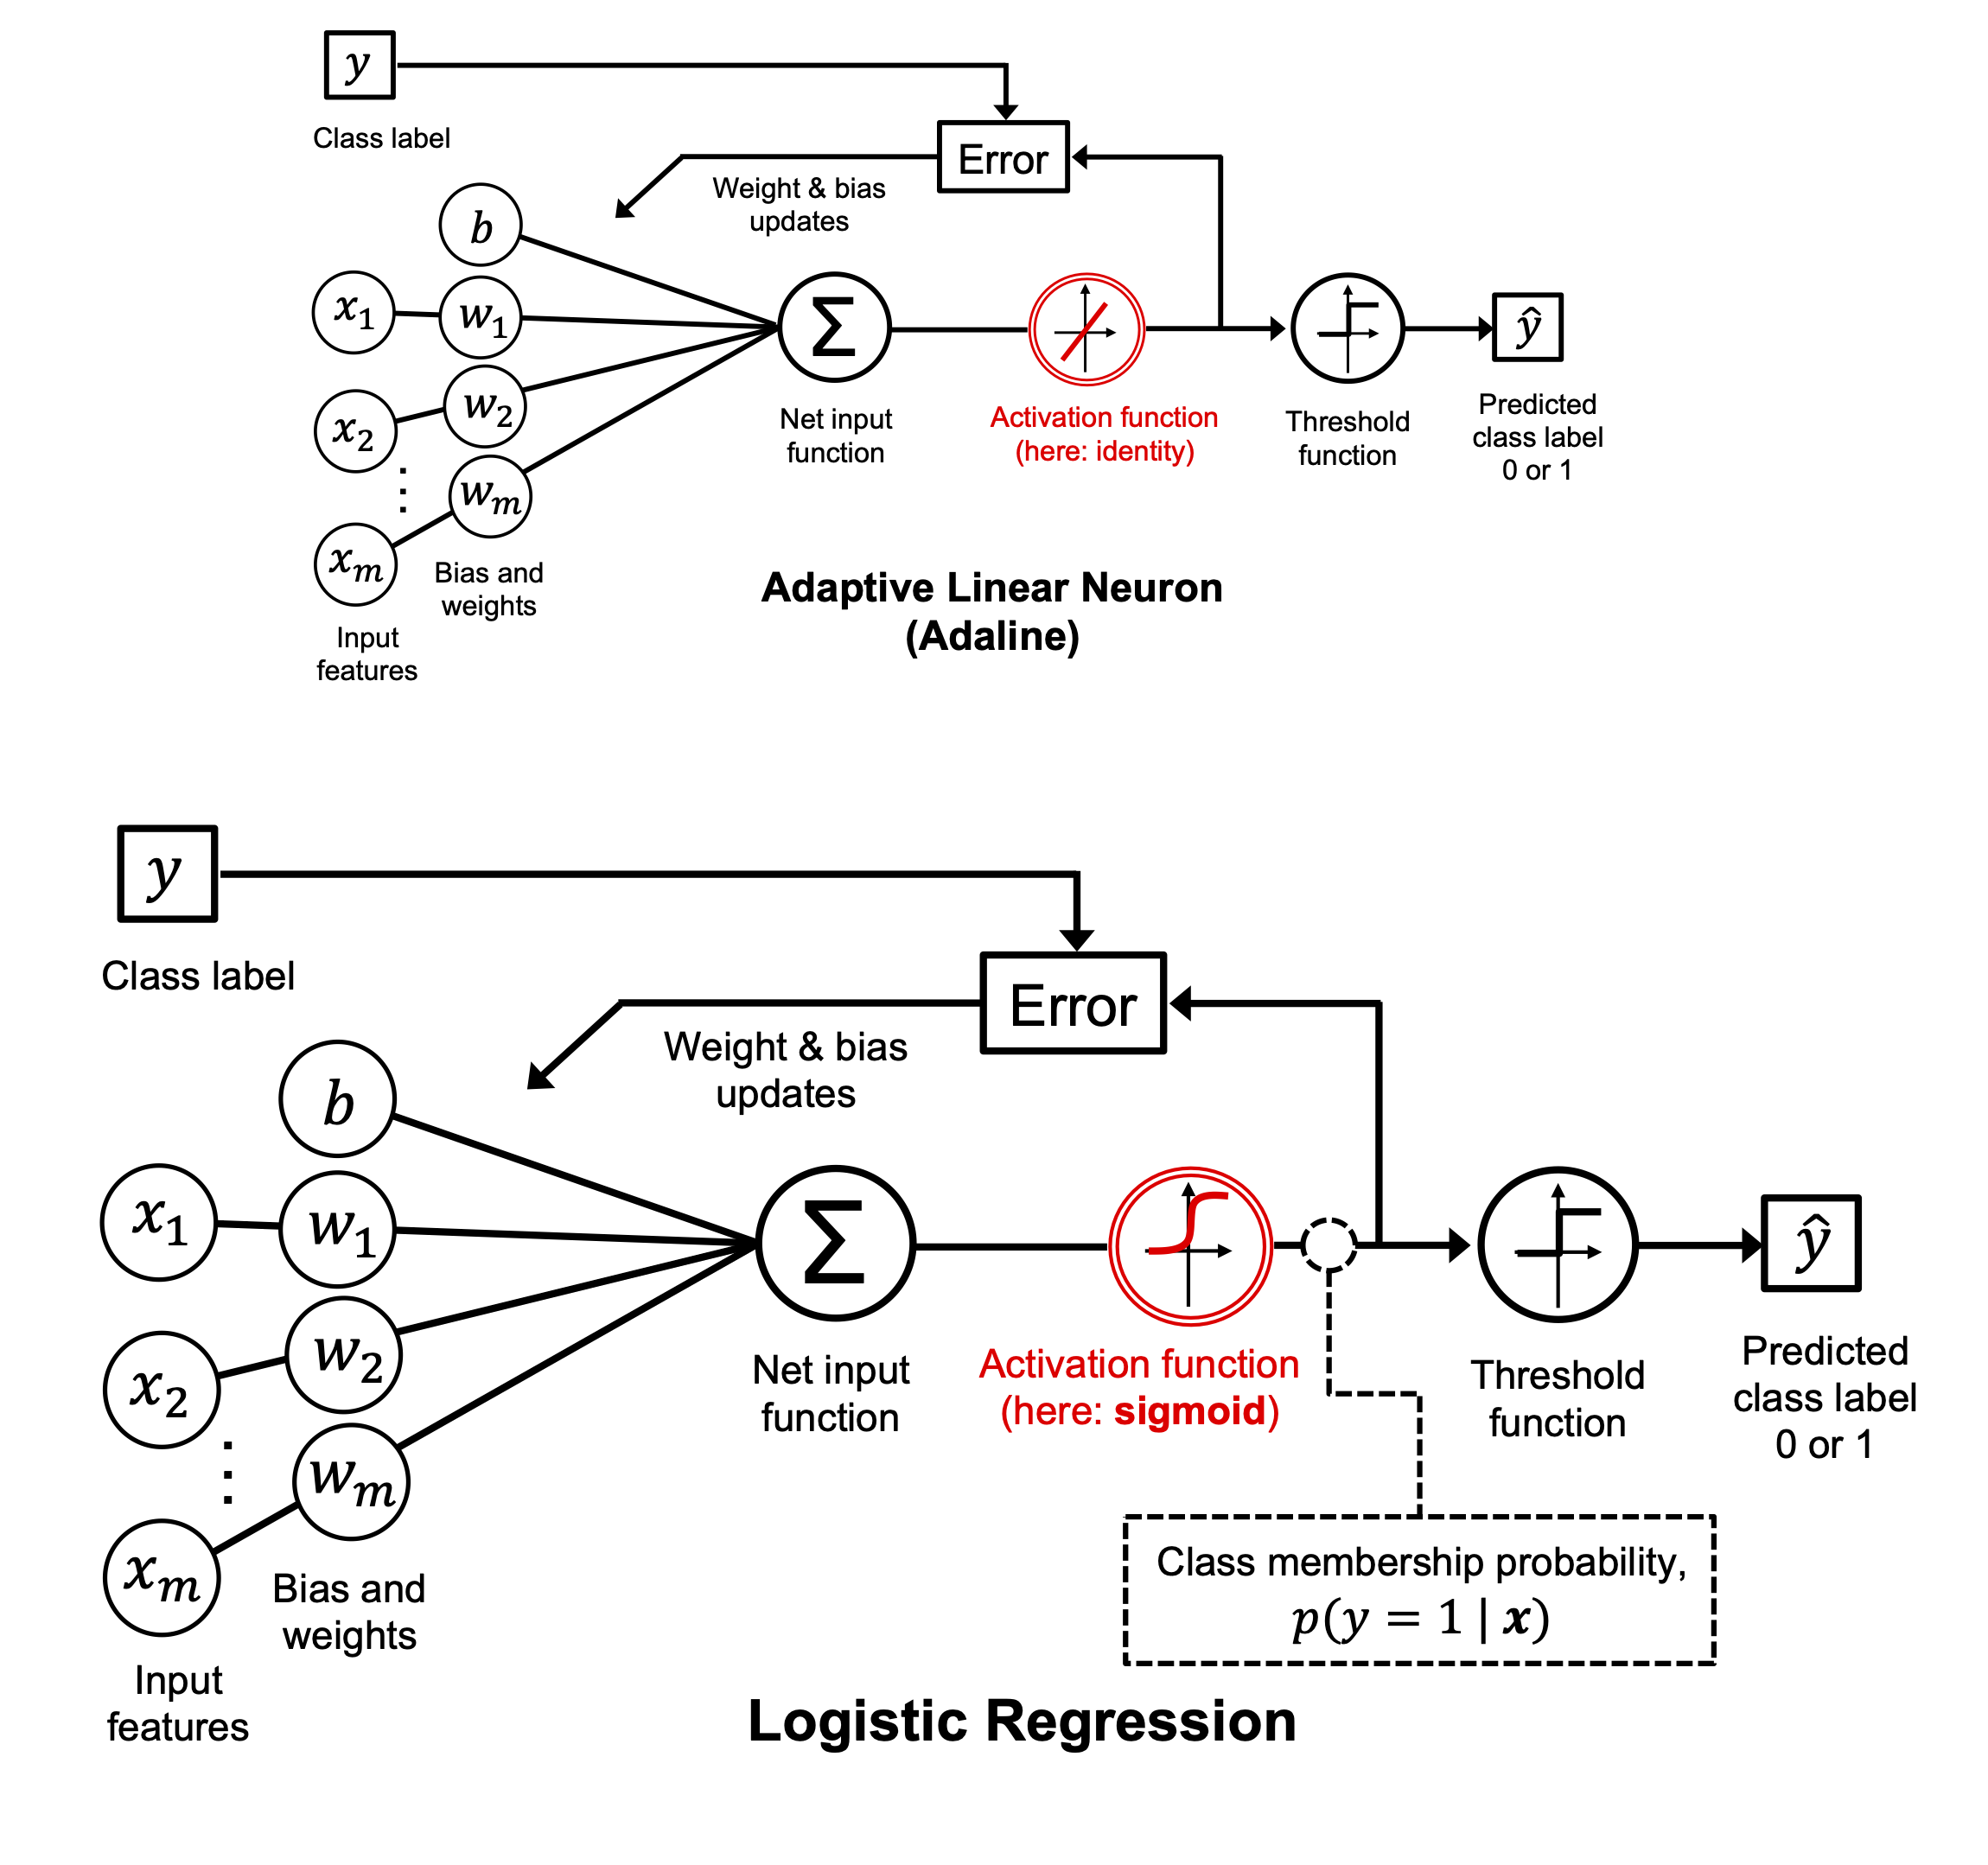

In [12]:

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()
x = df_wine.columns[1:]
df_wine.loc[:, x]
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Class labels [1 2 3]


In [13]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class My_SBS:
    def __init__(self, estimator, k, scoring=accuracy_score, test_size = 0.25, random_seed=1):
        self.estimator = clone(estimator)
        self.k = k
        self.scoring = scoring
        self.test_size = test_size
        self.random_seed = random_seed


    def fit(self, X, Y):

        X_train, X_test, Y_train, Y_test = \
            train_test_split(X, Y, test_size=self.test_size, random_state=self.random_seed)

        dim = X.shape[1]
        self.indices_ = tuple(range(dim))
        self.curr_features_ = [self.indices_]
        score = self._calc_score(X_train, X_test, Y_train, Y_test, self.indices_)
        self.score_ = [score]
        while dim > self.k:
            scores = []
            curr_features = []
            for i in combinations(self.indices_, r = dim-1):
                score = self._calc_score(X_train, X_test, Y_train, Y_test, i)
                scores.append(score)
                curr_features.append(i)

            best = np.argmax(scores)
            self.indices_ = curr_features[best]
            self.curr_features_.append(self.indices_)
            dim -= 1
            self.score_.append(scores[best])
        self.res_ = self.score_[-1]
        return self

    def _calc_score(self, X_train, X_test, Y_train, Y_test, ind):
        self.estimator.fit(X_train[:, ind], Y_train)
        Y_pred = self.estimator.predict(X_test[:, ind], )
        return self.scoring(Y_test, Y_pred)

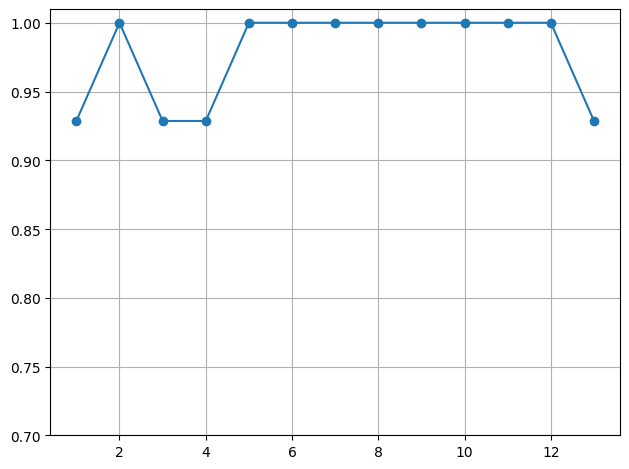

In [14]:
from sklearn.neighbors import KNeighborsClassifier
cl = KNeighborsClassifier(n_neighbors=5)
sns = My_SBS(cl, k=1)
sns.fit(X_test_std, y_test)
k_f = [len(i) for i in sns.curr_features_]

plt.plot(k_f, sns.score_, marker='o')
plt.tight_layout()
plt.ylim(0.7, 1.01)
plt.grid()

In [15]:
sns.curr_features_


[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10),
 (0, 1, 2, 3, 5, 6, 7, 8, 9),
 (0, 1, 2, 3, 5, 6, 7, 8),
 (0, 1, 2, 3, 5, 6, 7),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 6),
 (0, 1, 2, 6),
 (0, 1, 6),
 (0, 6),
 (6,)]

In [16]:
class full_my_Sns:
    def __init__(self, estimator, k_features, scoring=accuracy_score, random_seed=1, test_size=0.2):
        self.estimator= clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.random_seed=random_seed
        self.test_size=test_size

    def fit(self, X, Y):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=self.test_size)
        dim=X.shape[1]
        self.features_ = tuple(range(dim))
        scores = []
        comb_f = list(combinations(self.features_, r=self.k_features))
        for i in comb_f:
            scores.append(self._calc_score(X_train, X_test, Y_train, Y_test, i))
        print(scores)
        best = np.argmax(scores)
        print(best)
        print(max(scores))



        self.best_features = comb_f[best]
        print(self.best_features)
        return self




    def _calc_score(self, X_train, X_test, Y_train, Y_test, fs):
        self.estimator.fit(X_train[:, fs], Y_train)
        Y_pr = self.estimator.predict(X_test[:, fs])
        return self.scoring(Y_test, Y_pr)


new_f = full_my_Sns(estimator=cl, k_features=3)
new_f.fit(X_train_std, y_train)

[0.76, 0.8, 0.8, 0.76, 0.88, 0.76, 0.72, 0.8, 0.76, 0.96, 0.8, 0.8, 0.6, 0.8, 0.96, 0.68, 0.68, 0.68, 0.84, 1.0, 0.88, 0.72, 0.84, 0.92, 0.84, 0.76, 0.88, 0.8, 0.84, 0.88, 0.84, 0.96, 0.76, 0.8, 0.72, 0.8, 0.96, 0.84, 0.88, 0.76, 0.8, 0.92, 0.84, 0.8, 0.88, 0.88, 0.92, 0.96, 0.96, 0.92, 1.0, 0.72, 0.8, 0.88, 0.84, 0.72, 0.92, 0.88, 0.92, 0.84, 0.88, 0.84, 0.96, 0.84, 0.84, 0.92, 0.72, 0.68, 0.68, 0.8, 0.6, 0.6, 0.76, 0.68, 0.68, 0.76, 0.68, 0.68, 0.8, 0.52, 0.56, 0.72, 0.76, 0.8, 0.68, 0.72, 0.88, 0.72, 0.64, 0.8, 0.8, 0.88, 0.8, 0.76, 0.64, 0.56, 0.84, 0.76, 0.84, 0.84, 0.72, 0.76, 0.88, 0.88, 0.76, 0.96, 0.72, 0.88, 0.72, 0.68, 0.8, 0.68, 0.68, 0.84, 0.72, 0.84, 0.8, 0.88, 0.84, 0.88, 0.92, 0.64, 0.68, 0.88, 0.76, 0.6, 0.88, 0.76, 0.92, 0.76, 0.72, 0.88, 0.56, 0.6, 0.64, 0.76, 0.76, 0.8, 0.84, 0.68, 0.56, 0.8, 0.72, 0.76, 0.84, 0.76, 0.72, 0.92, 0.84, 0.8, 0.96, 0.6, 0.84, 0.6, 0.64, 0.76, 0.76, 0.76, 0.72, 0.72, 0.84, 0.8, 1.0, 0.8, 0.92, 0.96, 0.76, 0.88, 0.68, 0.76, 0.72, 0.92, 0.

In [17]:
cl = KNeighborsClassifier(n_neighbors=5)
cl.fit(X_train_std, y_train)

KNeighborsClassifier()

In [18]:
print(cl.score(X_train_std, y_train))
print(cl.score(X_test_std, y_test))

0.967741935483871
0.9629629629629629


In [19]:
best_f = new_f.best_features
best_f

(0, 2, 11)

In [20]:
cl.fit(X_train_std[:, best_f], y_train)

KNeighborsClassifier()

In [21]:
print(accuracy_score(cl.predict(X_train_std[:, best_f]), y_train))
print(accuracy_score(cl.predict(X_test_std[:, best_f]), y_test))

0.9435483870967742
0.8888888888888888


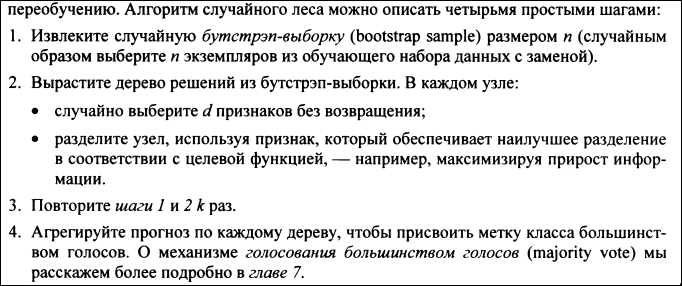

# 5  Сжатие данных путем уменьшения размерности, извлечение признаков.  
PCA ищет такие компоненты, где достигается максимальная дисперсия
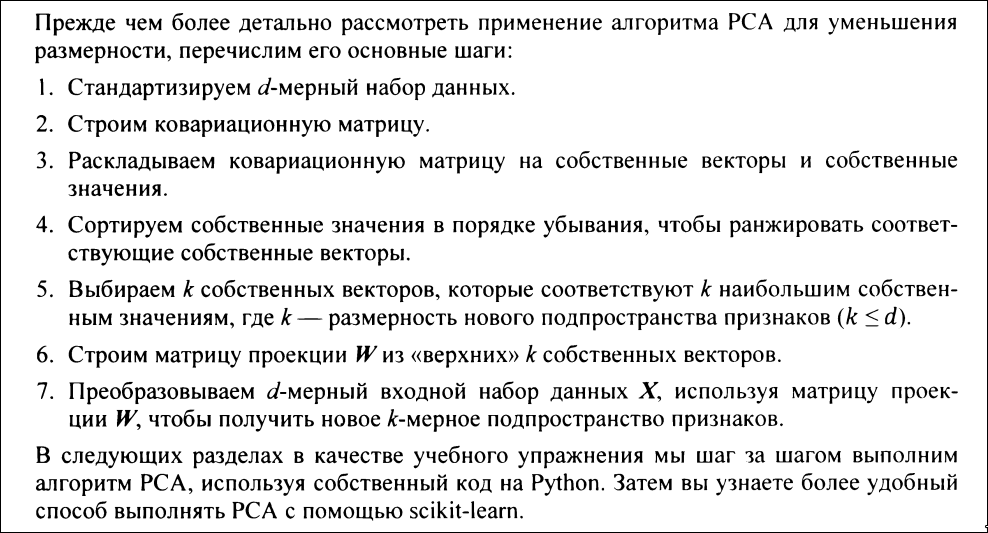  


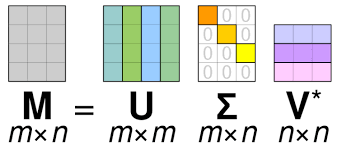

In [22]:
from sklearn.preprocessing import StandardScaler
class my_PCA:
    def __init__(self, n_components=None, random_seed=1):
        self.n_components=n_components
        self.random_seed=1
        self.total_components = None

    def fit(self, X):
        self.total_components = X.shape[1]
        sc = StandardScaler()
        X_std = sc.fit_transform(X)
        eigen_vals, eigen_vecs = np.linalg.eig((X_std.T @ X_std)/(X_std.shape[0] - 1))
        if (self.n_components is None):
            self.n_components = X_std.shape[1]

        idx = np.argsort(eigen_vals)[::-1]
        self.eigen_vals_ = eigen_vals[idx]
        self.eigen_vecs_ = eigen_vecs[:, idx]
        self.components_ = self.eigen_vecs_[:, :self.n_components]
        self.explained_var_ = self.eigen_vals_[:self.n_components]
        self.total_var_ = np.sum(self.eigen_vals_)
        self.explained_var_ratio_ = self.explained_var_/self.total_var_
        return self

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def transform(self, X):
        sc = StandardScaler()
        X_std = sc.fit_transform(X)
        return X_std @ self.components_

    def inverse_transform(self, X):
        return X @ self.components_

In [23]:
pc = my_PCA(n_components=2)

In [24]:
x = pc.fit_transform(X_train_std)

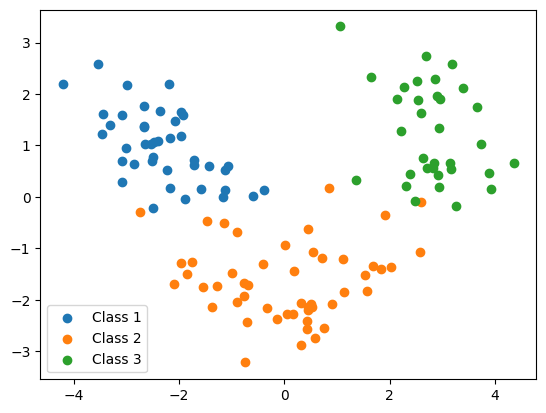

In [25]:
for i in (np.unique(y_train)):
    plt.scatter(x[y_train ==i, 0], x[y_train ==i, 1], label=f'Class {i}')

plt.legend()

(1.0, 2.0)

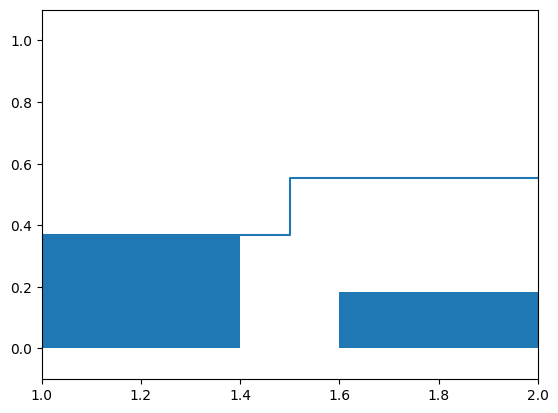

In [26]:
plt.bar(range(1, len(pc.explained_var_) + 1), pc.explained_var_ratio_, align='center')
plt.step(range(1, len(pc.explained_var_) + 1), np.cumsum(pc.explained_var_ratio_), where='mid',
         label='Cumulative explained variance')

plt.ylim(-0.1, 1.1)
plt.xlim(range(1, len(pc.explained_var_) + 1))

Вклад признаков в компонетны

In [27]:
loading = pc.components_.T * np.sqrt(pc.eigen_vals_)
loading[0]

array([-0.3020184 ,  0.38430421, -0.03167121,  0.20289109, -0.14161847,
       -0.32039955, -0.30045935,  0.17996604, -0.17161586,  0.03491026,
       -0.138697  , -0.14447844, -0.09729946])

(-1.0, 1.0)

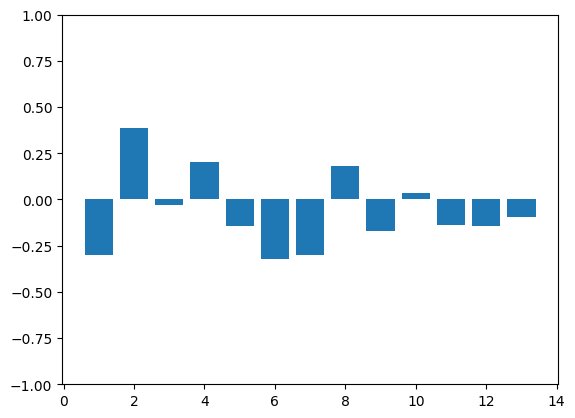

In [28]:
plt.bar(range(1, len(loading[0]) + 1), loading[0], align='center')
plt.ylim([-1, 1])

In [29]:
from sklearn.datasets import load_digits

digits = load_digits()

In [30]:
y_digits = digits.target
X_digits = digits.data
pc = my_PCA(n_components=3)
a = pc.fit_transform(X_digits)
a.shape

(1797, 3)

/tmp/ipykernel_49621/706617934.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x[colors == i, 0],


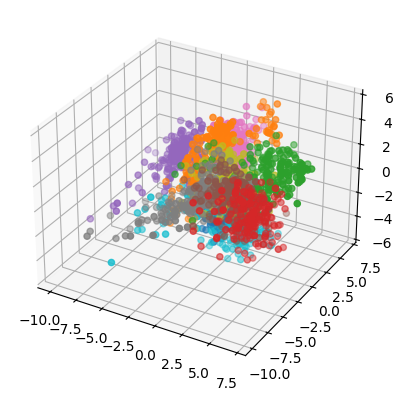

In [31]:
from sklearn.datasets import load_digits

digits = load_digits()

y_digits = digits.target
X_digits = digits.data
pc = my_PCA(n_components=3)
a = pc.fit_transform(X_digits)

import matplotlib.patheffects as PathEffects

col = plt.cm.tab10(np.linspace(0, 1, 10))
def plot_projection(x, colors, col):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # f = plt.figure(figsize=(8, 8))
    # ax = plt.subplot(aspect='equal')
    for i, c in zip(range(10), col):
        ax.scatter(x[colors == i, 0],
                    x[colors == i, 1], x[colors == i,2], c=c)


plot_projection(a, y_digits, col)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()


## LDA  
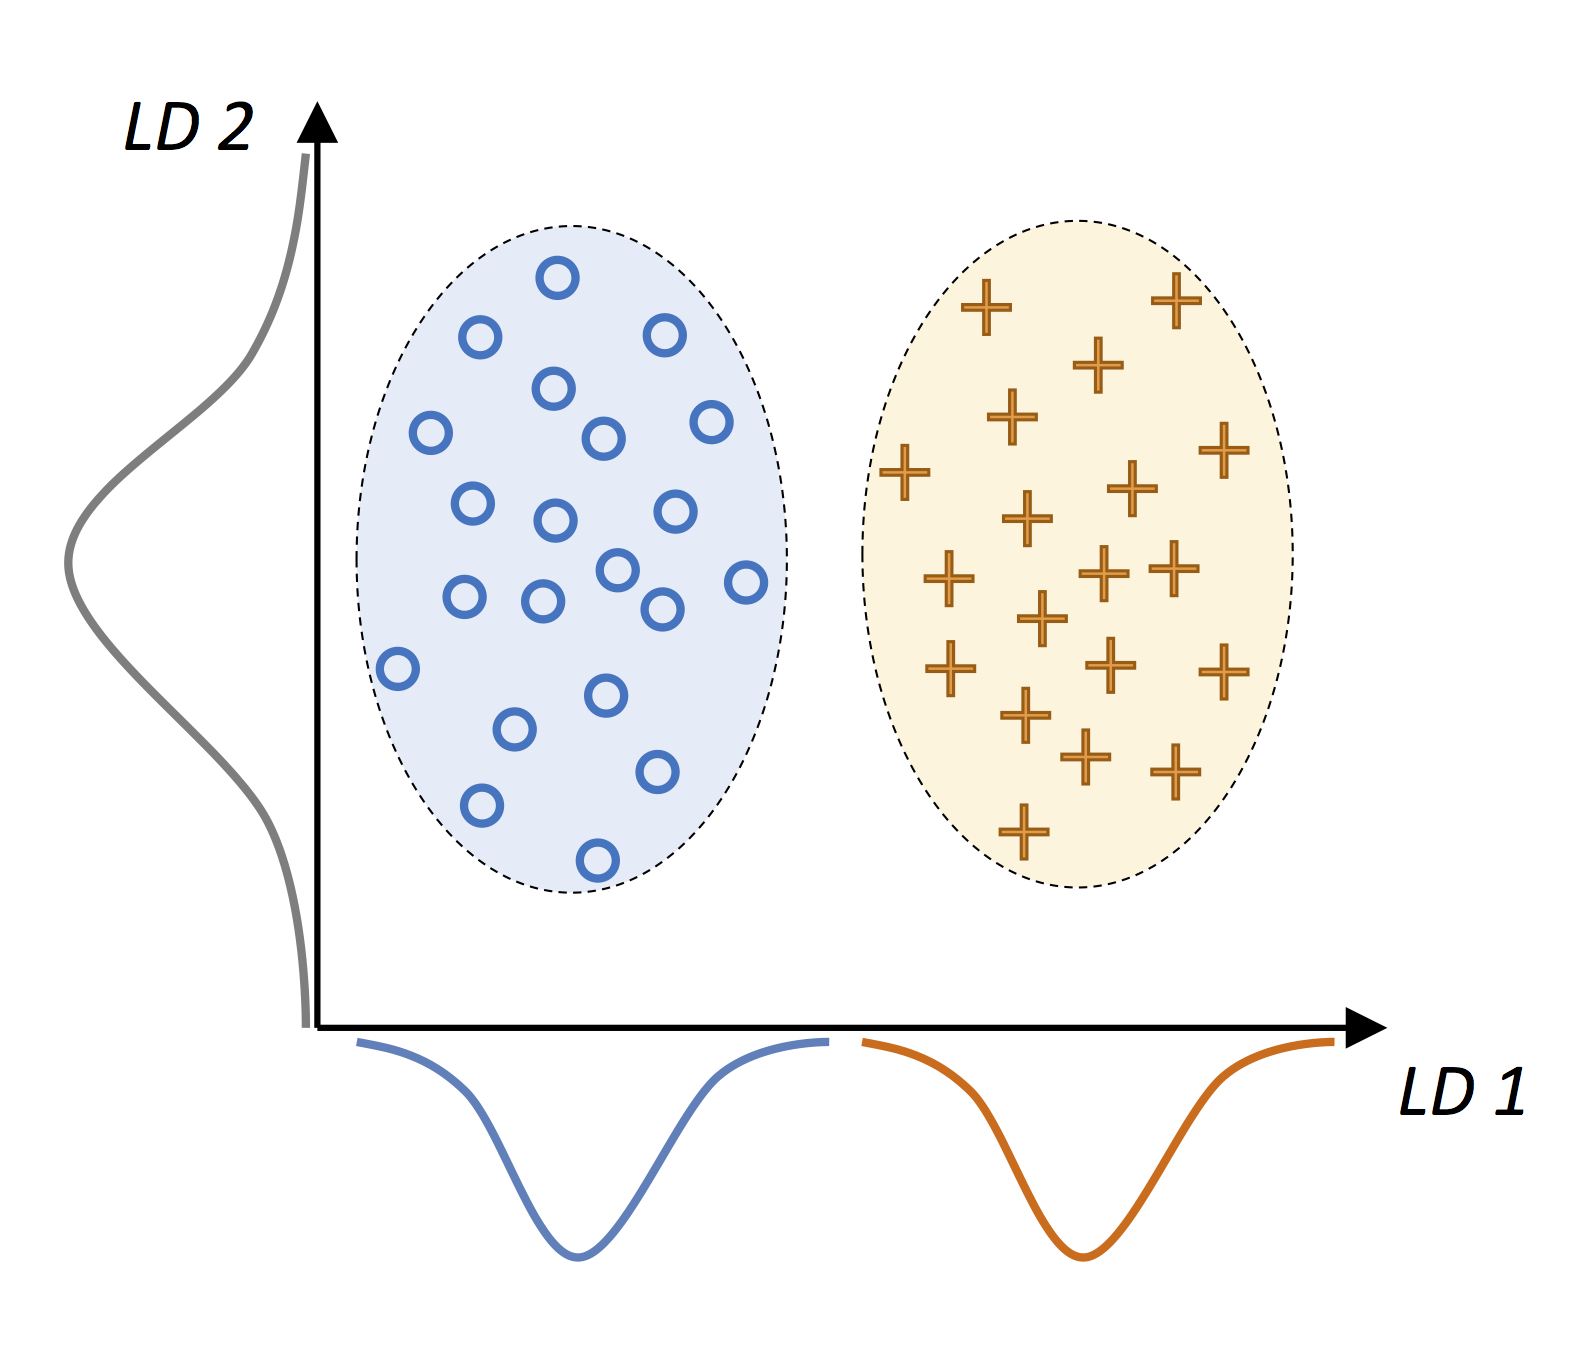  
1. Данные распределены нормально
2. Классы имеют идентичные ковариационные матрицы  
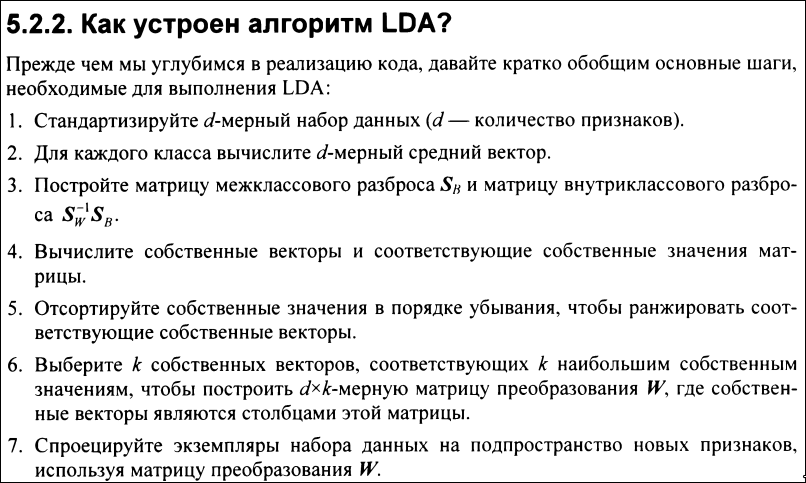  


$m_i = \frac{1}{n_i}\sum_{x \in D_i}{x_m}$  
$S_W = \sum_{i=1} ^ {c}{S_i}$  
$S_i = \sum_{x \in D_i}{(x - m_i)(x-m_i)^{T}}$  
$\Sigma_i = \frac{1}{n_i} S_i = \frac{1}{n_i}\sum_{x \in D_i}{(x - m_i)(x-m_i)^{T}}$  
$S_b = \sum_{i=1}^c{n_i*(m_i - m)(m_i - m)^T}, m - \text{общее среднее, включающее все классы}$  
Ищем собственные векторы и значения для $S_w ^{-1} S_b$  
$X' = XW$

## Нелинейное уменьшение размерности  
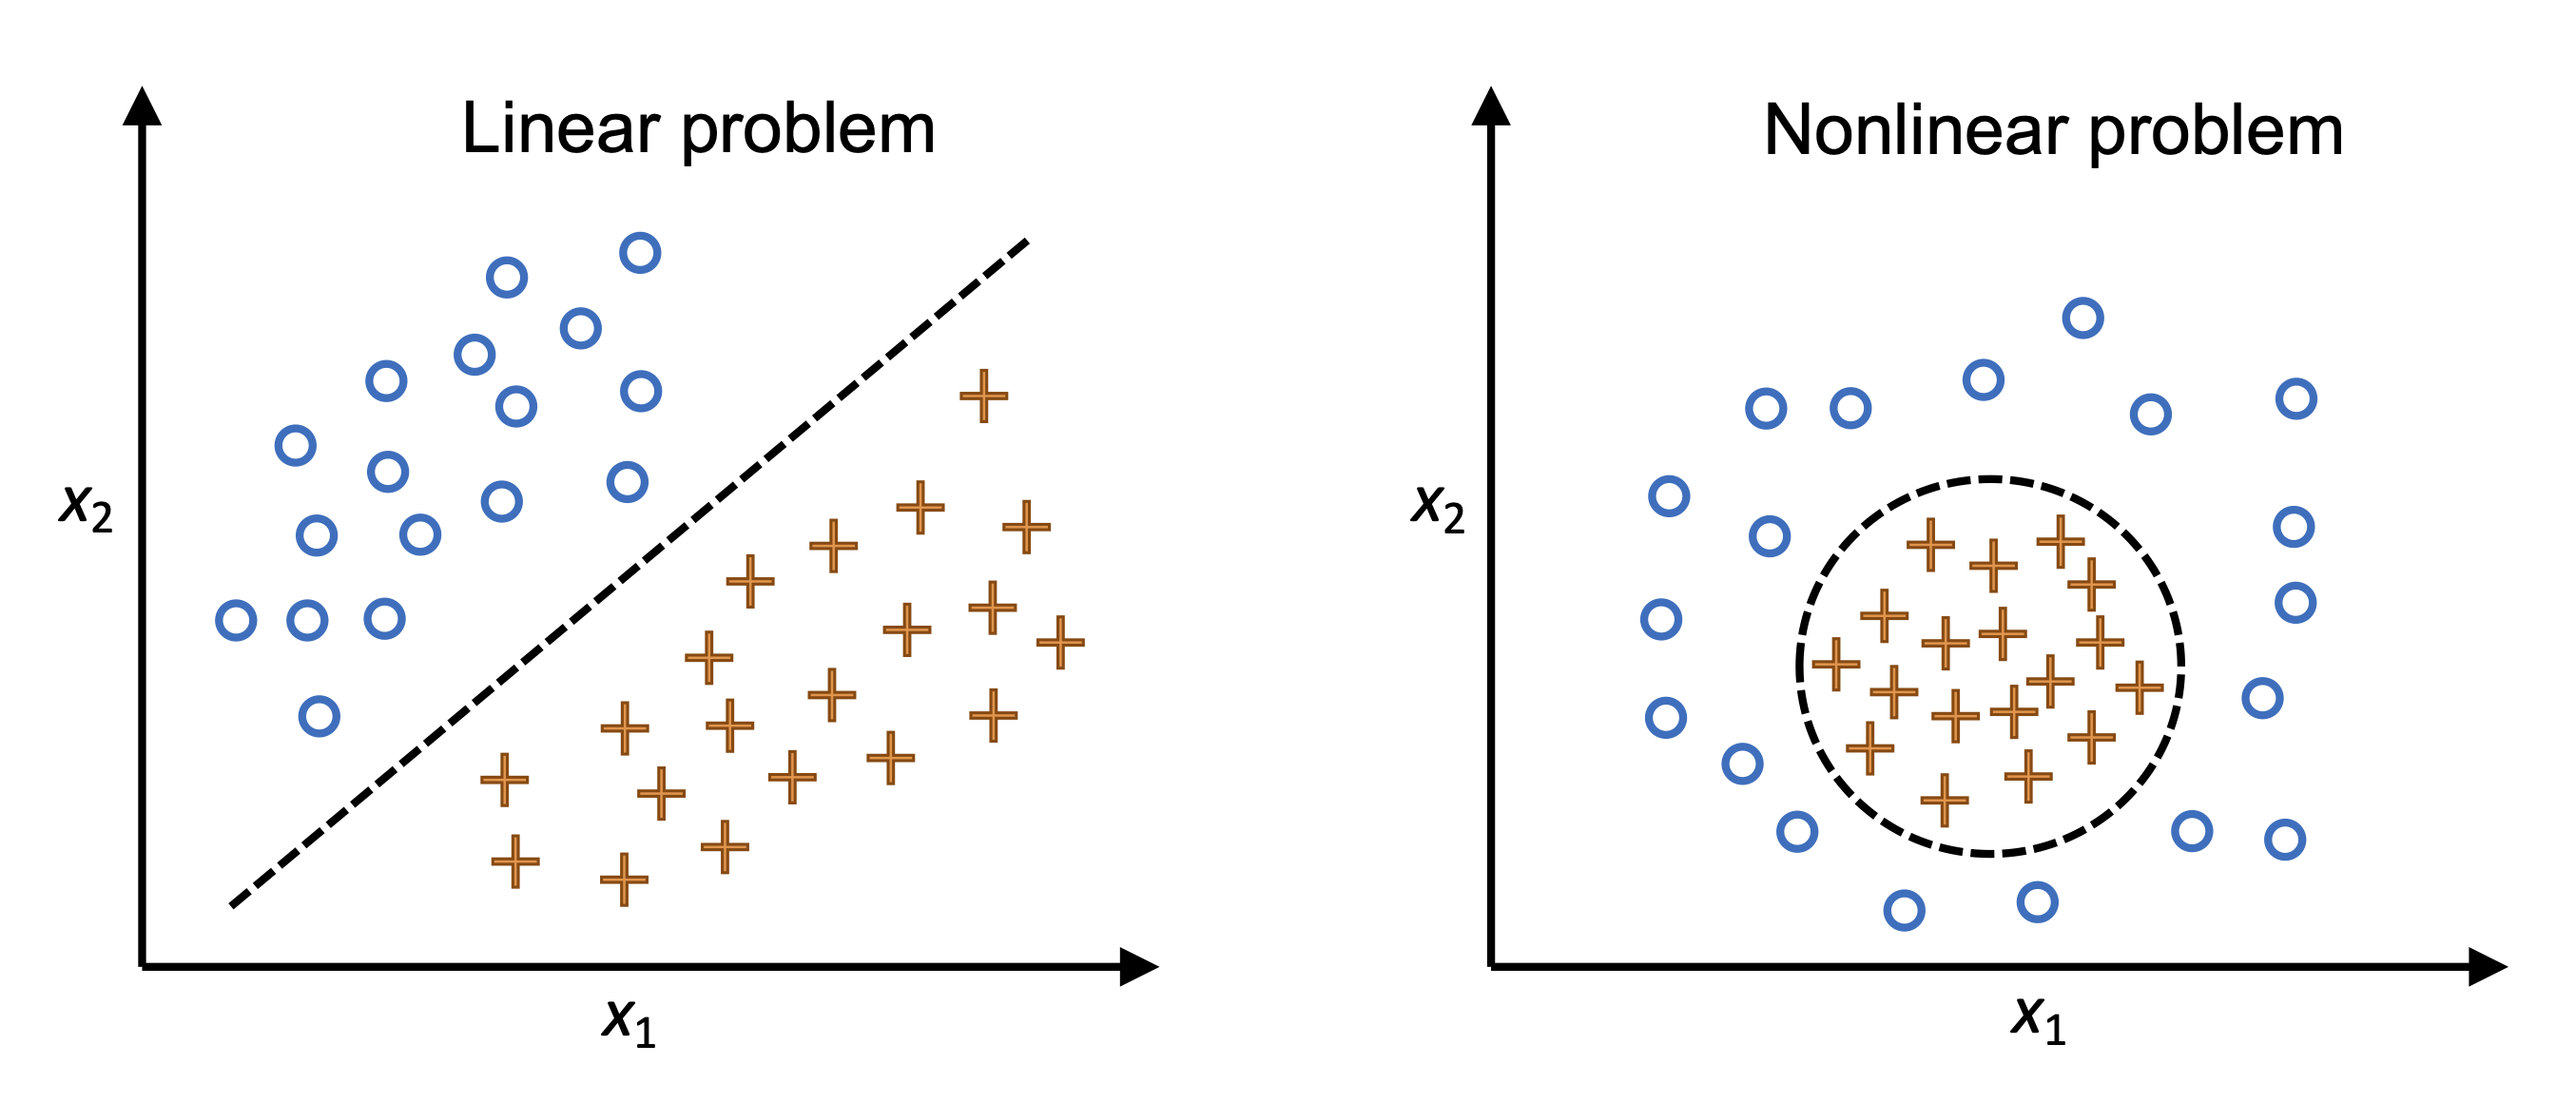  


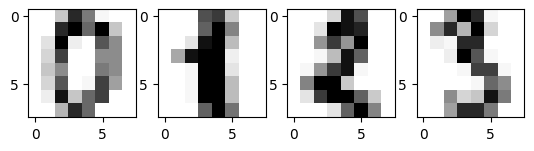

In [32]:
fig, ax = plt.subplots(1, 4)

for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')

# plt.savefig('figures/05_12.png', dpi=300)
plt.show()

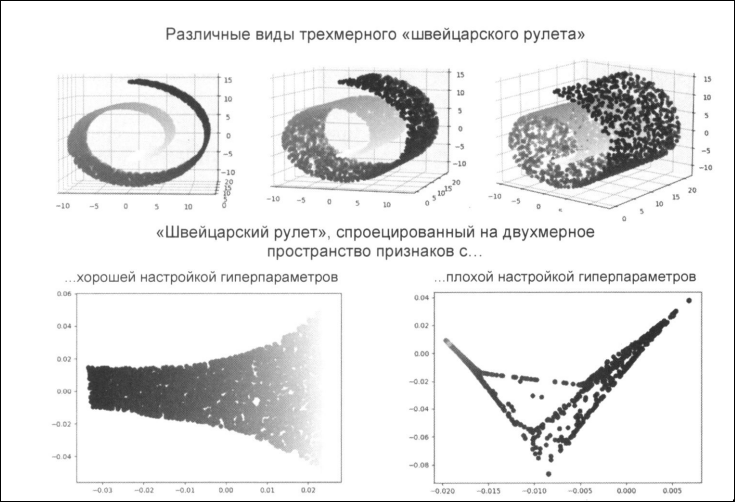

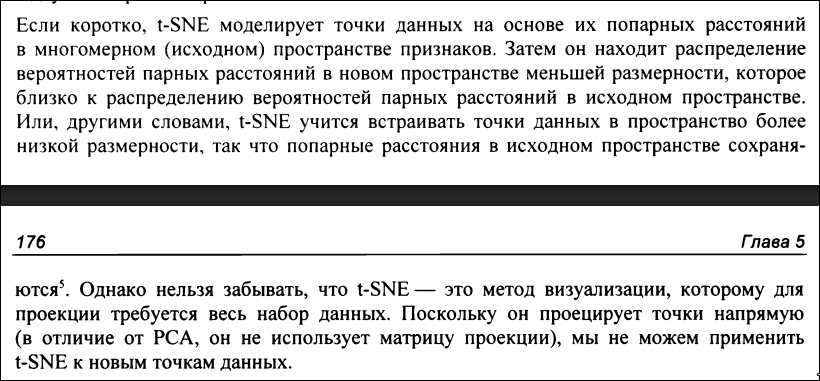

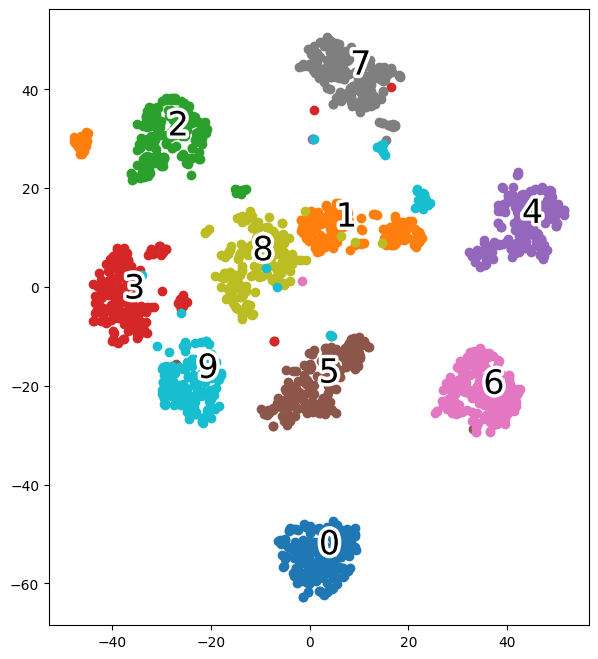

In [33]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2,
            init='pca',
            random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

import matplotlib.patheffects as PathEffects


def plot_projection(x, colors):

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])

    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])

plot_projection(X_digits_tsne, y_digits)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()

## Глава про pipeline 

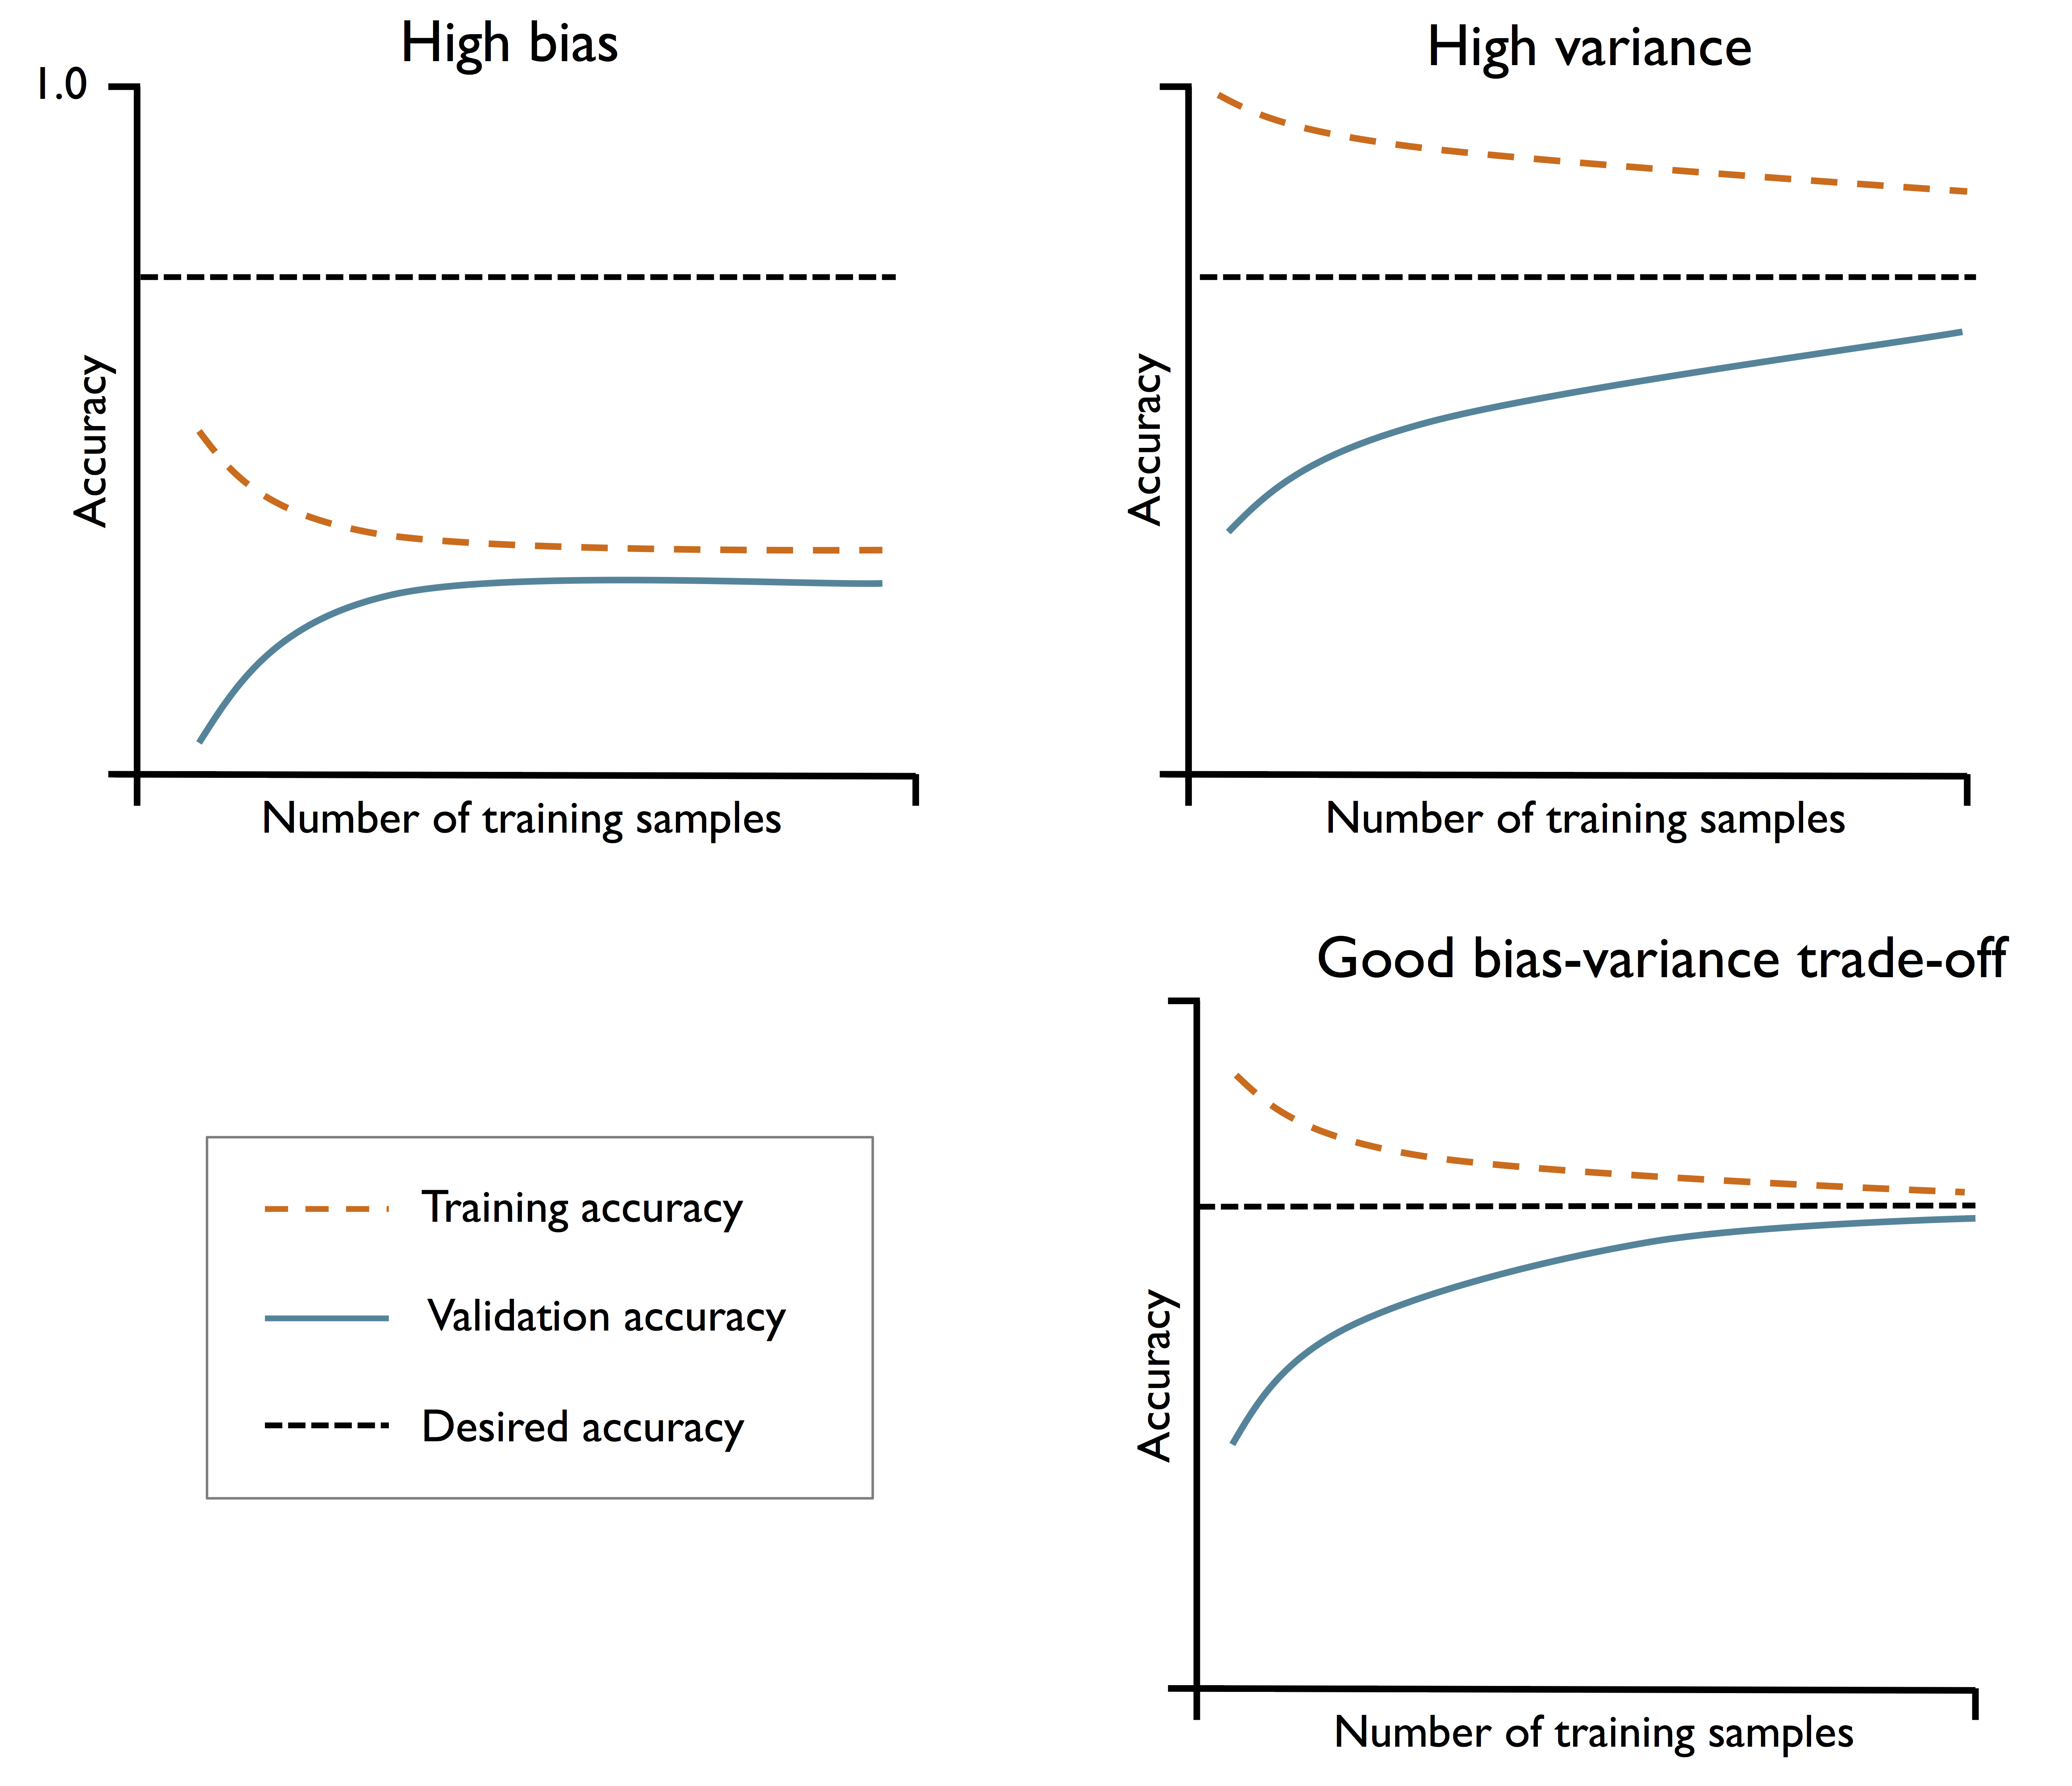

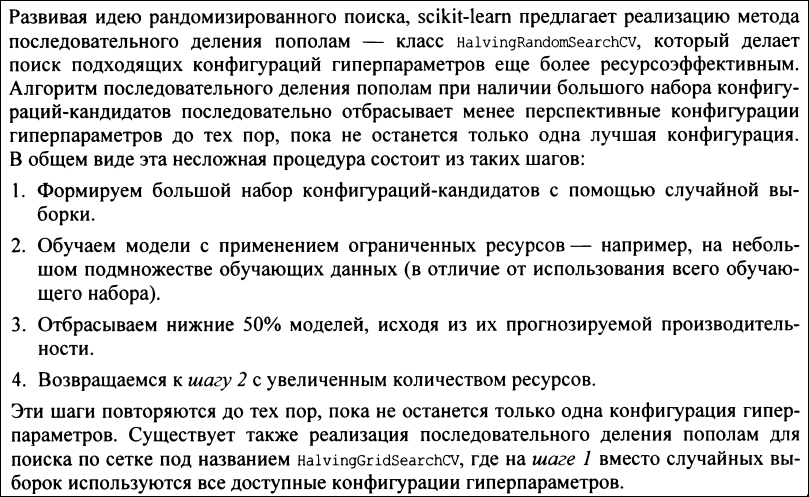

Nested cross validation  
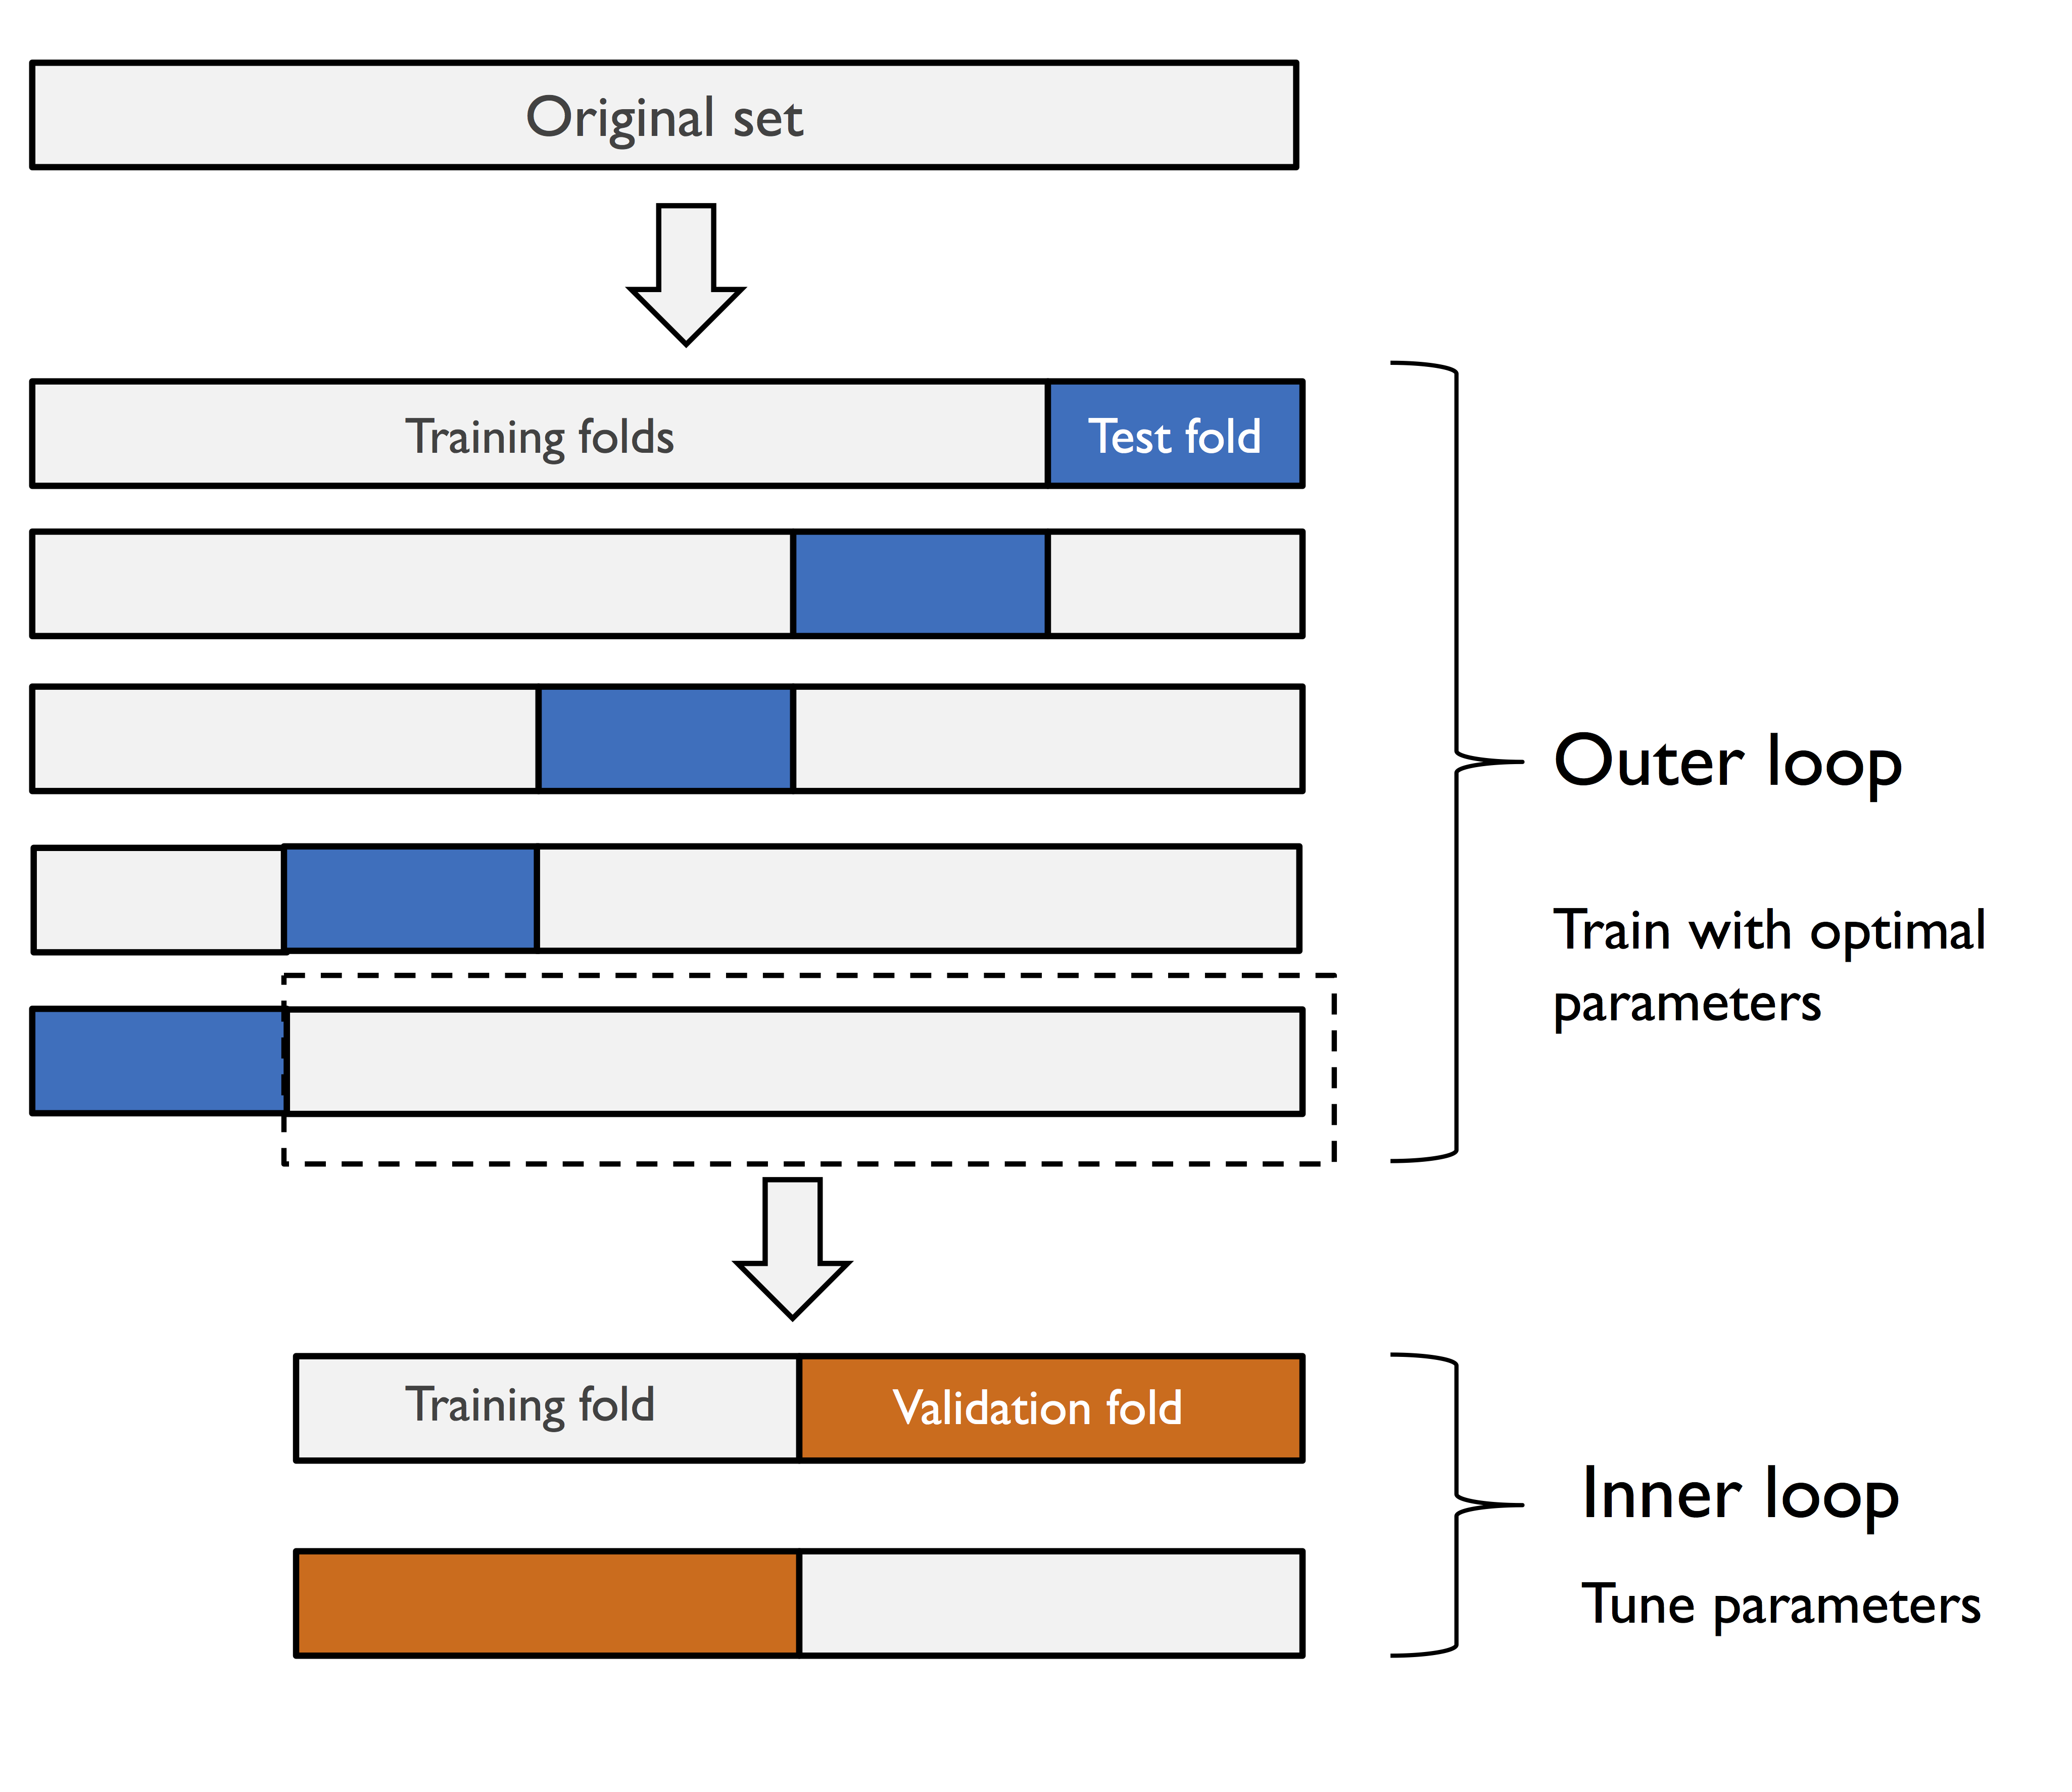

## Метрики классификации  
$REC = TPR = \frac{TP}{P} = \frac{TP}{FN + TP}$ - определяется сколько релевантных записей (положительных) распознано правильно  
Точность определяет сколько записей, предсказанных как релевантные были релевантными на самом деле: $PRE = \frac{TP}{TP + FP}$  
$F1 (сред.гармон) =  2 * \frac{PRE * REC}{PRE + REC}$  
Коэффицент корреляции Метью: $MCC = \frac{TP * TN - FP * FN}{\sqrt{(TP + FP)*(TP + FN)*(TN + FP)*(TN + FN)}}$ - считается лучшим показателем  

#  Ансамбли  

* Мажоритарное голосование - 50%+ (в бинарной классификации)  
* Голосование относительным большинством - многоклассовая классификация  
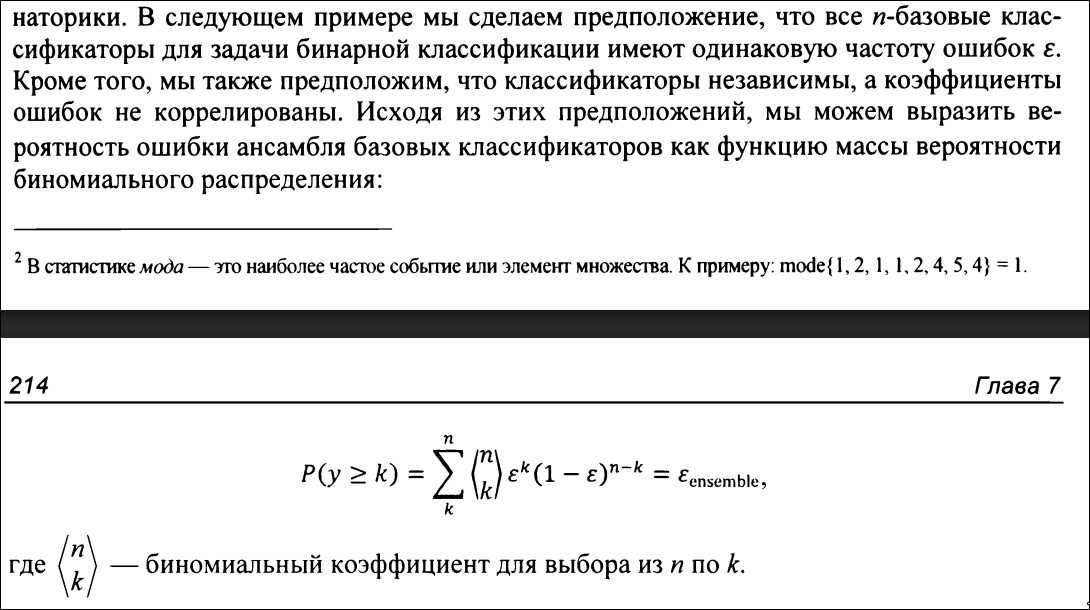

Формальная запись голосования с весами: $$\bar{y} = \argmax_i \sum^{m}_{j=1}{\sum^{n-1}_{i=0}w_j * [C_j (x) = i]_i}$$
w_j - вес базового классификатора $C_j$; $\bar{y} - предсказания, n - 1 - метки классов$. В случае, если веса одинаковы, то: $$\bar{y}=mode{\{C_1(x), C_2(x) \dots, C_m(x)\}}$$
Пример: $i \in \{0, 1\}$ $C_1, C_2 = 0, C_3=1$. Если веса одинаковы, то мода - 0, но, пусть $w_3 = 0.6, w_1, w_2 = 0.2 \to$  $$\bar{y} = \argmax_i \sum^{m}_{j=1}{\sum^{n-1}_{i=0}w_j * [C_j (x) = i]_i} = \argmax_i{[0.2 * i_0 + 0.2 * i_0, 0.6 * i_1]} = 1$$  
Такое можно проделывать и с вероятностными моделями: $$\bar{y} = \argmax_i \sum^{m}_{j=1}{\sum^{n-1}_{i=0}w_j * p_{ij}}$$  
$C_1(x) = [0.9, 0.1], C_2 = [0.8, 0.2], C_3(x) = [0.4, 0.6], w_1=w_2 = 0.2, w_3=0.6 \to$  $$p(i_0 | x) = 0.2 * 0.9 + 0.2 * 0.8 + 0.6 * 0.4$$  $$p(i_1 | x) = 0.2 * 0.1 + 0.2*0.2 + 0.6*0.6 = 0.42$$  $$\bar{y} = \argmax_i{[p(i_0 | x), p(i_1 | x)]} = 0$$

In [34]:
# My ensemble
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import _name_estimators

class my_maj(ClassifierMixin, BaseEstimator):
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.name_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights=weights

    def fit(self, X, y):
        if (self.vote not in ('classlabel', 'probability')):
            raise ValueError('vote must be \'classlabel\' or \'probability\' ')
        if (self.weights and len(self.weights) != len(self.classifiers)):
            raise ValueError('Number of weight and classifiers must be equal')

        self.labec_ = LabelEncoder()
        self.labec_.fit(y)
        self.classes_ = self.labec_.classes_
        self.classifiers_ = []
        for i in self.classifiers:
            self.classifiers_.append(clone(i).fit(X, self.labec_.transform(y)))
        return self

    def predict(self, X):
        if (self.vote == 'probability'):
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:
            predictions = np.asarray([cl.predict(X) for cl in self.classifiers_])
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights=self.weights)), axis=1, arr=predictions)
        maj_vote = self.labec_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        probs = np.asarray([cl.predict_proba(X) for cl in self.classifiers_])
        avg_proba = np.average(probs, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep = True):
        if not deep:
            return super().get_params(deep)
        else:
            out = self.name_classifiers.copy()
            for name, step in self.name_classifiers.items():
                for key, val in step.items():
                    out[f'{name}__{key}'] - val
            return out

In [35]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
       train_test_split(X, y,
                        test_size=0.5,
                        random_state=1,
                        stratify=y)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


clf1 = LogisticRegression(penalty='l2',
                          C=0.001,
                          solver='lbfgs',
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} '
          f'(+/- {scores.std():.2f}) [{label}]')


10-fold cross validation:

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]


In [36]:
# Majority Rule (hard) Voting

mv_clf = my_maj(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} '
          f'(+/- {scores.std():.2f}) [{label}]')

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]
ROC AUC: 0.98 (+/- 0.05) [Majority voting]


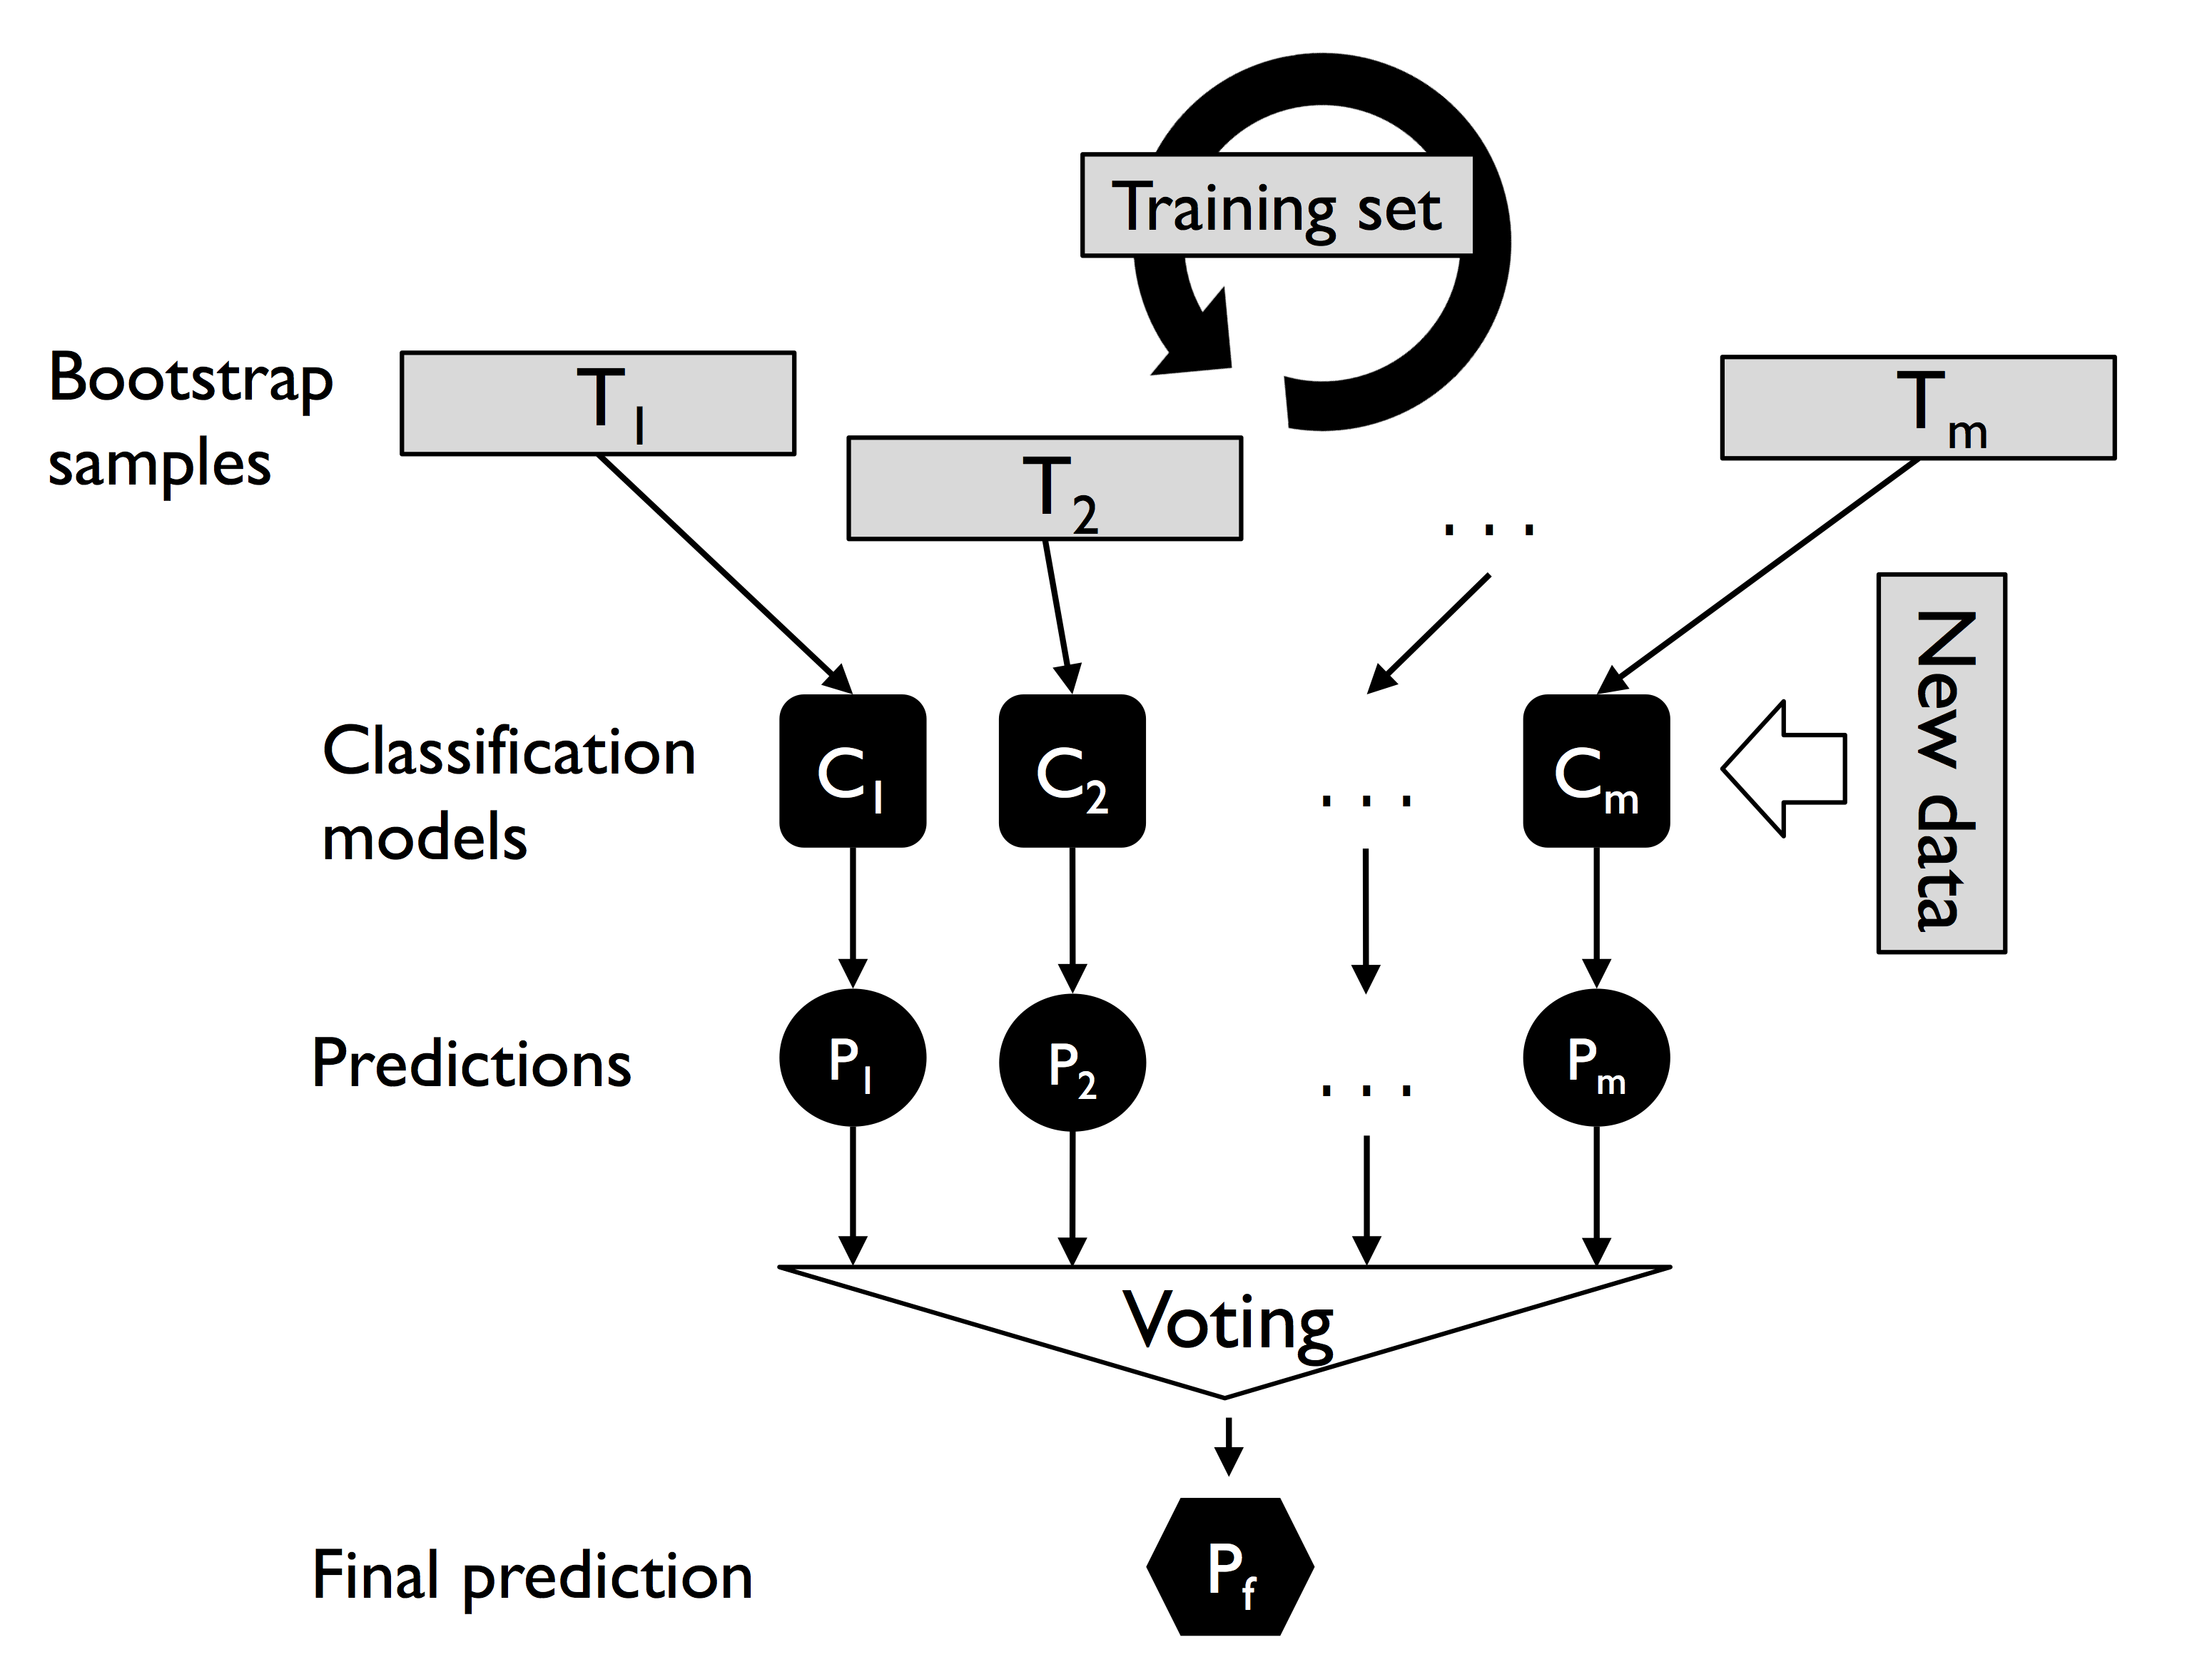

Однако бэггинг почти не уменьшает систематические
ошибки, т. е. он плохо работает с моделями, которые слишком просты, чтобы хорошо
улавливать тенденции в данных. Вот почему бэггинг обычно стараются применять
к классификаторам с низкой систематической ошибкой - например, к несокращенным
деревьям решений.

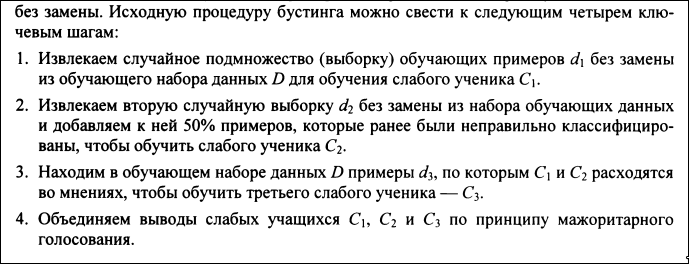

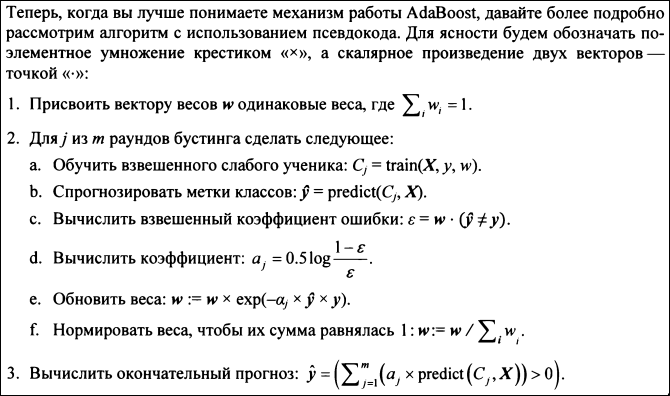

Пробую в Adaboost  
Input: 
  - Обучающая выборка (x1, y1), ..., (xm, ym), где yi ∈ {−1, +1}
  - Количество итераций T

Initialize:
  - Вес каждого примера: D1(i) = 1/m

For t = 1 to T:
  1. Обучи слабый классификатор ht(x) с использованием весов Dt
  2. Вычисли ошибку:
       εt = ∑ [i от 1 до m] Dt(i) * [ht(xi) ≠ yi]
  3. Вычисли вес модели:
       αt = 0.5 * ln((1 - εt) / εt)
  4. Обнови веса примеров:
       Dt+1(i) = Dt(i) * exp(-αt * yi * ht(xi))
  5. Нормализуй веса:
       Dt+1(i) = Dt+1(i) / Zt, где Zt — нормализующий коэффициент

Output:
  Финальный классификатор:
    H(x) = sign(∑ αt * ht(x))


Откуда взялось, что αt = 0.5 * ln((1 - εt) / εt)?  
$a_t$ - вес каждой модели в ответе. У нас есть взвешенная ошибка классификатора: $\epsilon_t = \sum^{m}{D_t(i) * [h_t(x_i) \neq y_i]}$, где $D_t(x_i)$ - вес примера.  
Целевая функция: $\sum{\exp{-y_i * F(x_i)}}$, $F(x) = \sum^T{a_t * h_t(x)}$ -  композиция классификатор.  
На каждом шаге у нас задача выбрать $a_t$ такое, чтобы он минимизировал: $$\sum^{m}{D_t(x_i) * \exp(-a_t * y_i * h_t(x_i))}$$ Перешли к взвешенной экспоненциальной потере.  
Разобьем потери на right/wroong: $$\sum^{m}{D_t(i) * \exp(-a_t * y_i * h_t(x_i))} = \sum_{right}{D_t(x_i) * \exp{-a_t}} + \sum_{wrong}{D_t(x_i) * \exp{a_t}}$$  $$=L(a_t) = \exp{(-a_t)} * (1 - \epsilon_t) + \epsilon_t * \exp{(a_t)}$$  Дифференцируем: $$\frac{L(a_t)}{d(a_t)} = -\exp{(-a_t)} * (1 - \epsilon_t) + \epsilon_t * \exp{(a_t)} = 0$$ $$\to$$
$$e^{2a_t} = \frac{1 - \epsilon_t}{\epsilon_t} \to a_t = \frac{1}{2}\ln(\frac{1 - \epsilon_t}{\epsilon_t})$$

Регрессия:  
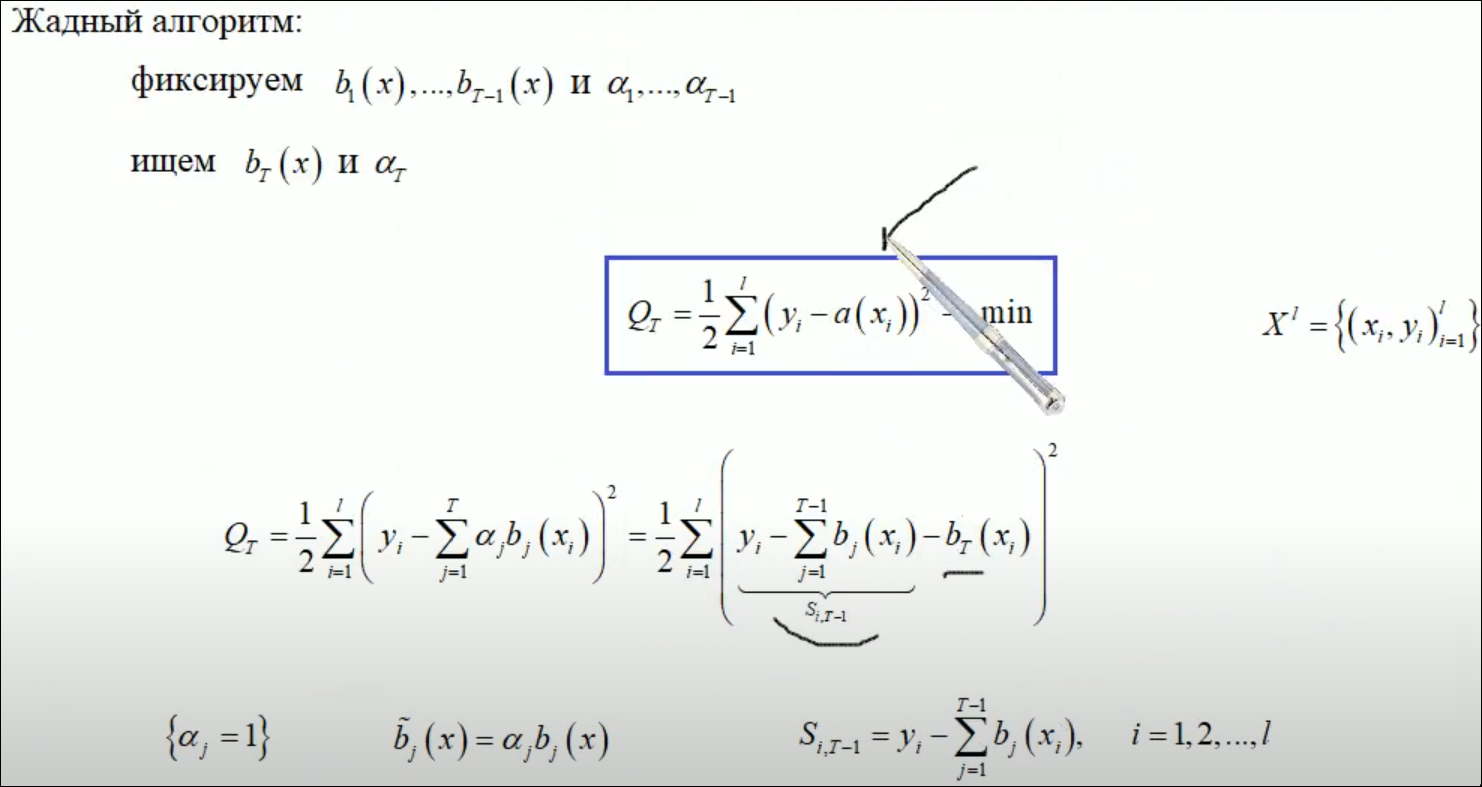

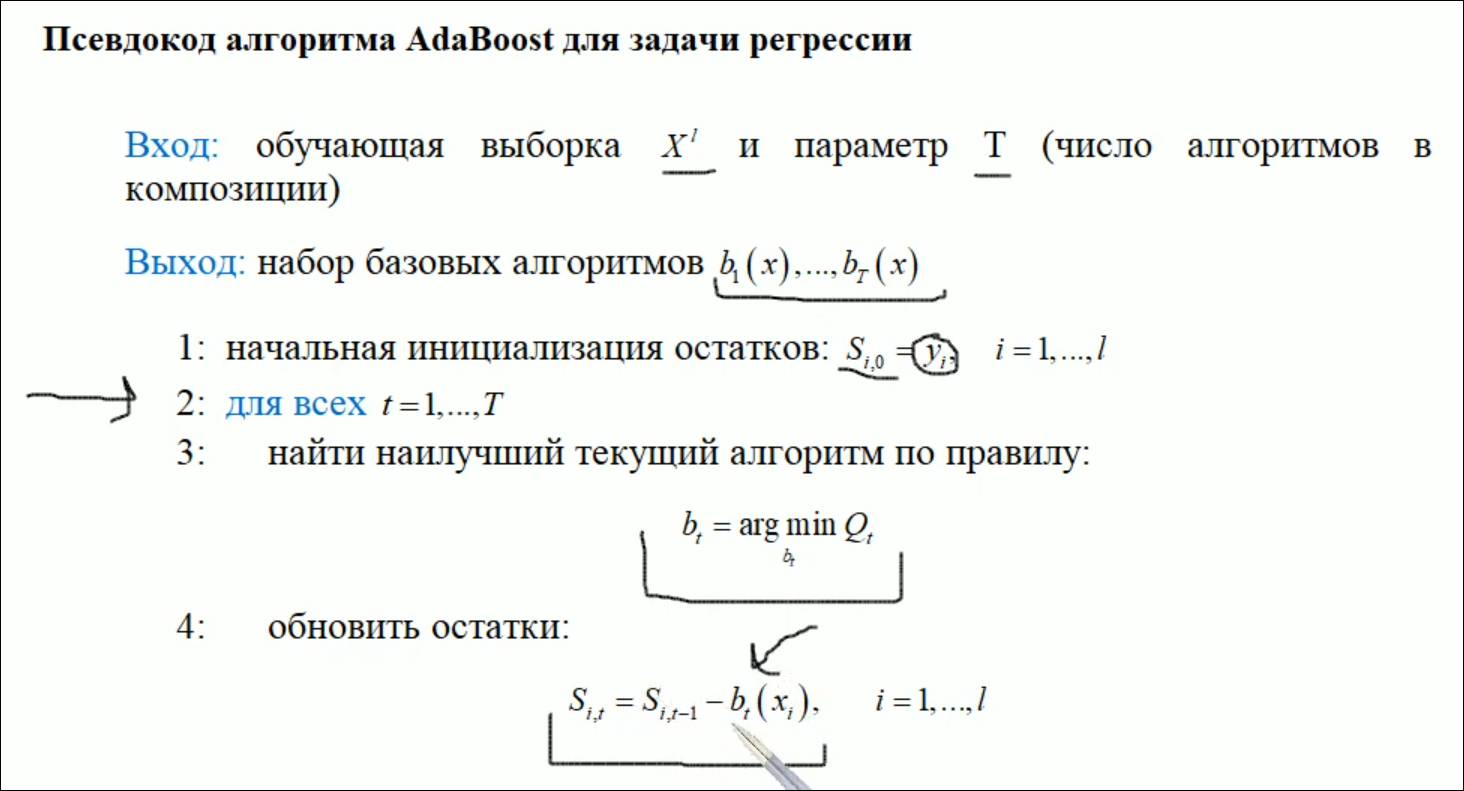

Чтобы меньше переобучаться можно исключать объекты со слишшком большими весами

In [37]:
from math import sqrt, exp, log
class my_Adaboost_cl:
    def __init__(self, estimator, T):
        self.estimator = estimator
        self.T = T
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        n = X.shape[0]
        W = np.full(n, 1./n)
        for _ in range(self.T):
            curr_model = clone(self.estimator).fit(X, y, sample_weight=W)
            y_pr = curr_model.predict(X)
            y_pr = np.where(y_pr == 0, -1, 1)
            acc = (y_pr != y)
            error = np.dot(W, acc)/np.sum(W)
            EPS = 1e-10
            error = np.clip(error, EPS, 1 - EPS)
            at = 0.5 * np.log((1 - error)/error)
            W *= np.exp(at * y * y_pr)
            W /= np.sum(W)
            self.models.append(curr_model)
            self.alphas.append(at)
        return self
    def predict(self, X):
        model_predict = [alpha * np.where(model.predict(X) == 0, -1, 1) for alpha, model in zip(self.alphas, self.models)]
        return np.sign(np.sum(model_predict, axis=0))


In [38]:
from sklearn.ensemble import AdaBoostClassifier


tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=1,
                              random_state=1)

ada = my_Adaboost_cl(estimator=tree,
                         T=500)
from sklearn.metrics import accuracy_score


In [39]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'Decision tree train/test accuracies '
      f'{tree_train:.3f}/{tree_test:.3f}')

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print(f'AdaBoost train/test accuracies '
      f'{ada_train:.3f}/{ada_test:.3f}')

Decision tree train/test accuracies 0.940/0.900
AdaBoost train/test accuracies 0.500/0.500


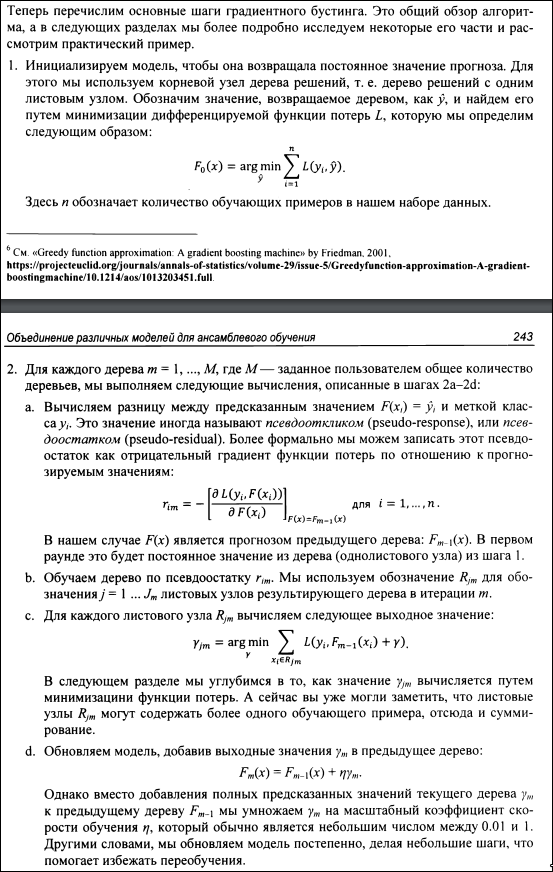

# my_gr_boost

# Регрессионный анализ  
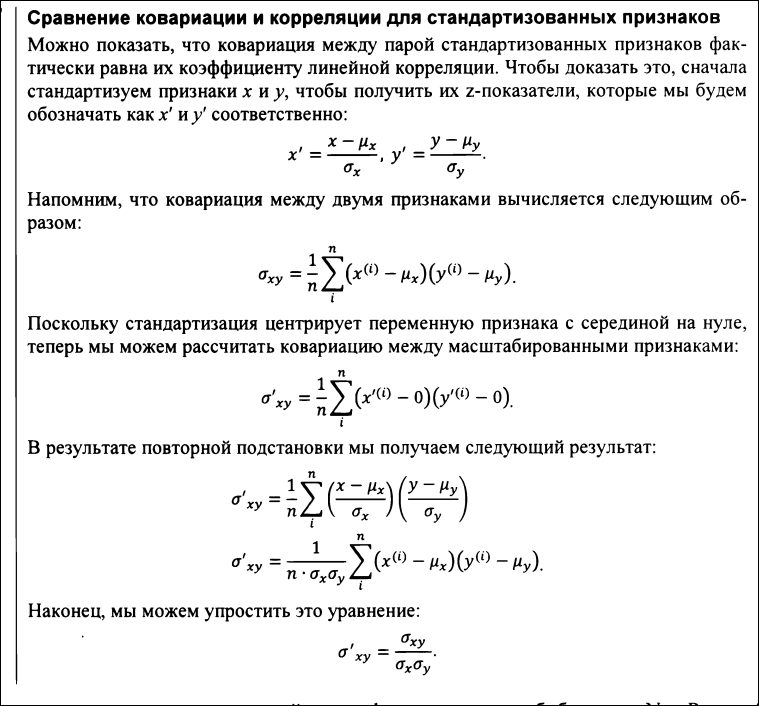

In [40]:
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep='\t',
                 usecols=columns)

df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
# remove rows that contain missing values

df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

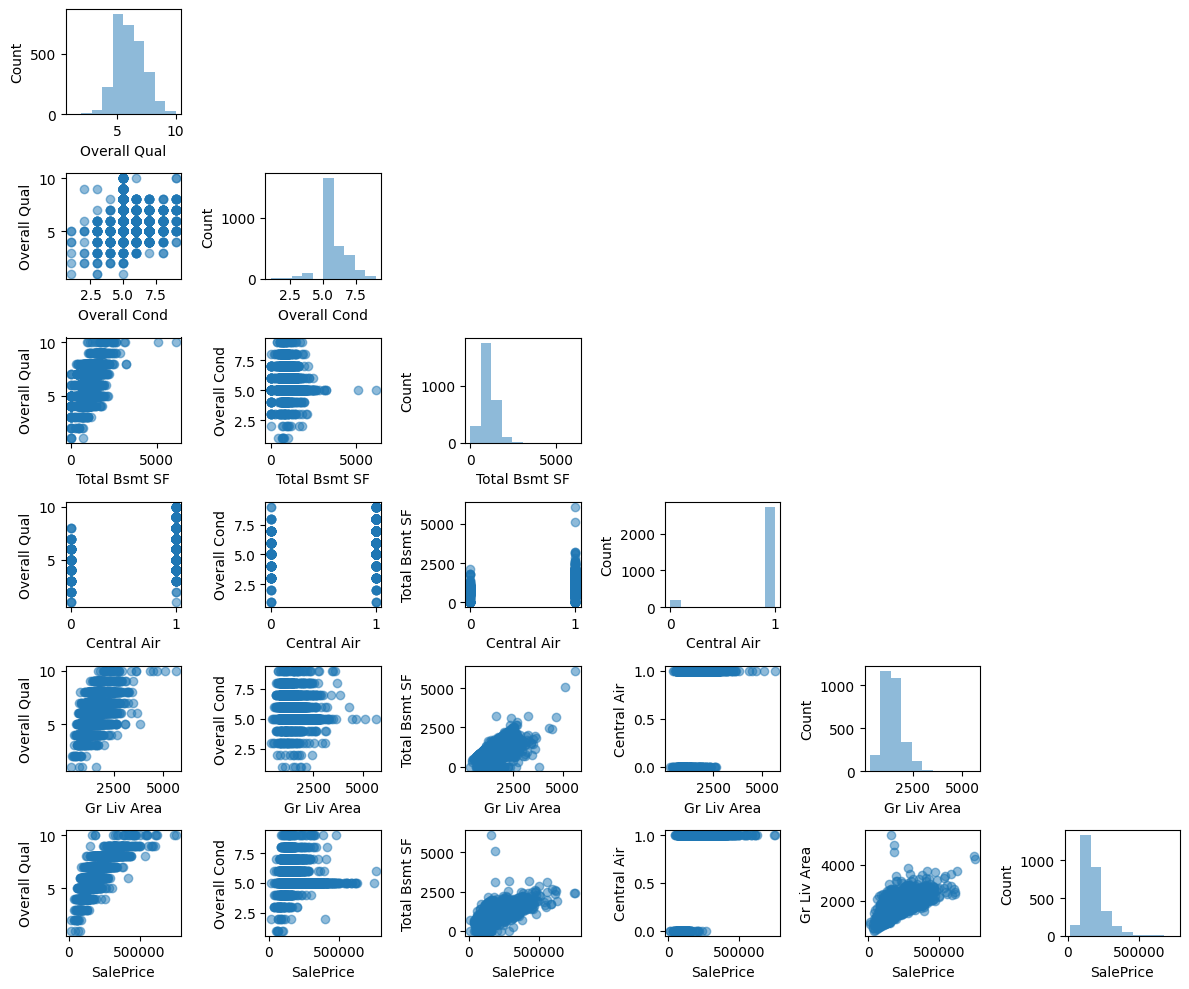

In [41]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12, 10),
                  names=df.columns, alpha=0.5)
plt.tight_layout()
#plt.savefig('figures/09_04.png', dpi=300)
plt.show()

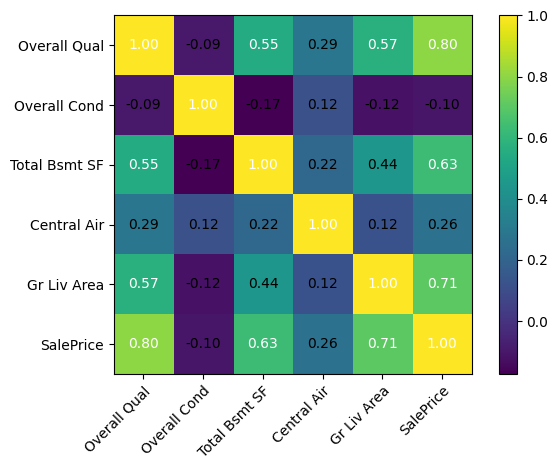

In [42]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()
#plt.savefig('figures/09_05.png', dpi=300)
plt.show()

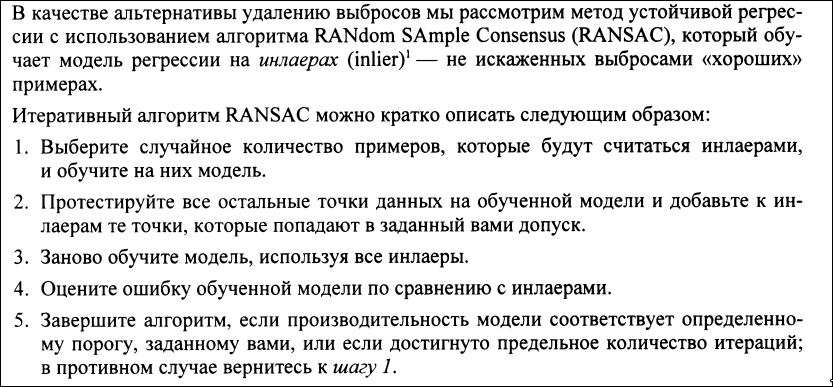

In [43]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

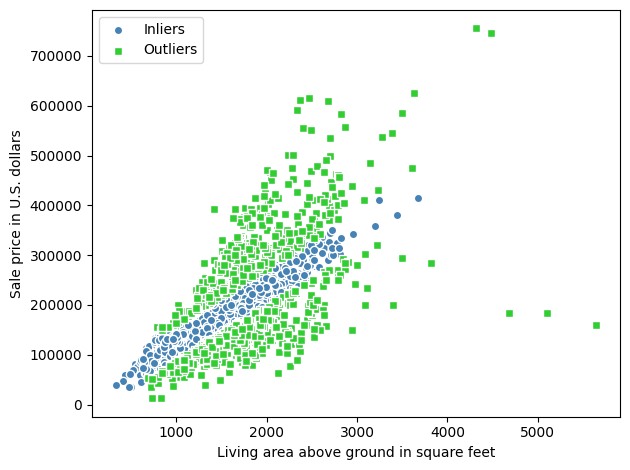

In [44]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100, # default
                         min_samples=0.95,
                         loss='absolute_error', # default
                         residual_threshold=None, # default
                         random_state=123)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
# plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_09.png', dpi=300)
plt.show()

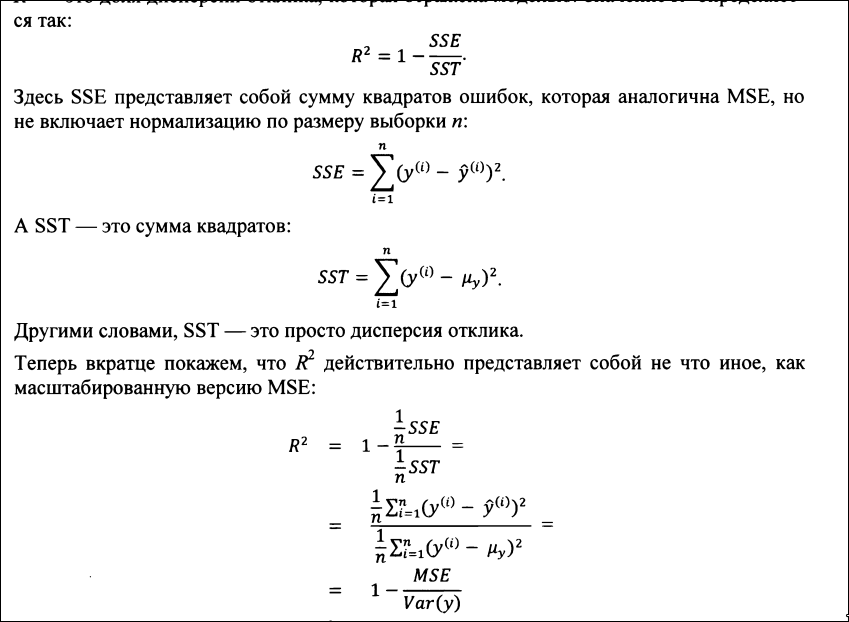

#  Кластеризация  
## Мягкие F-means, FCM  
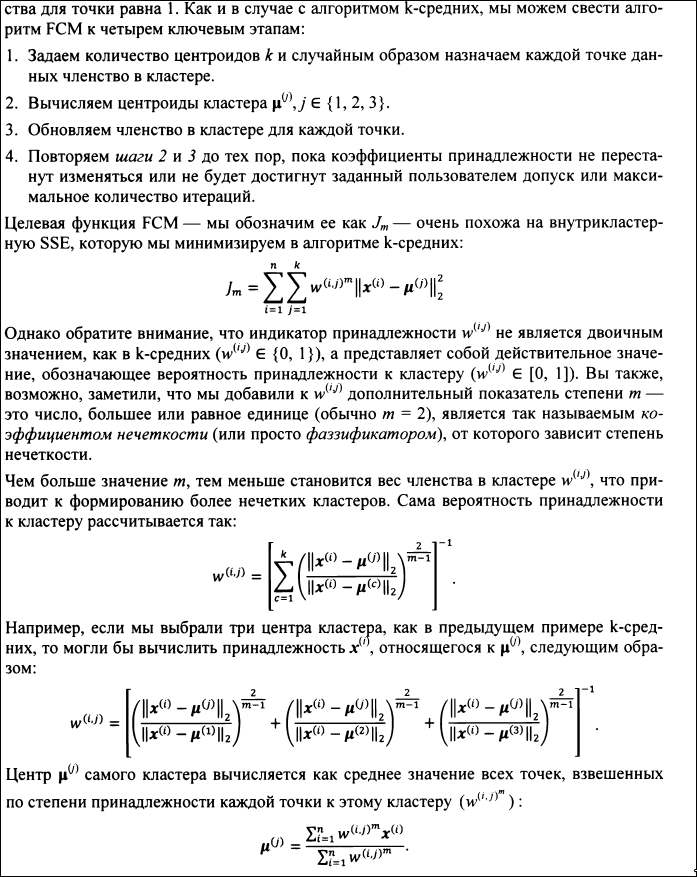

Чем больше кластеров, тем меньше ошибка кластеризации (например, сумма квадратов расстояний от точек до центроидов). Но с определённого момента выигрыш становится маленьким.

Ты ищешь "точку перегиба" графика , похожую на локоть — там, где улучшение резко замедляется.

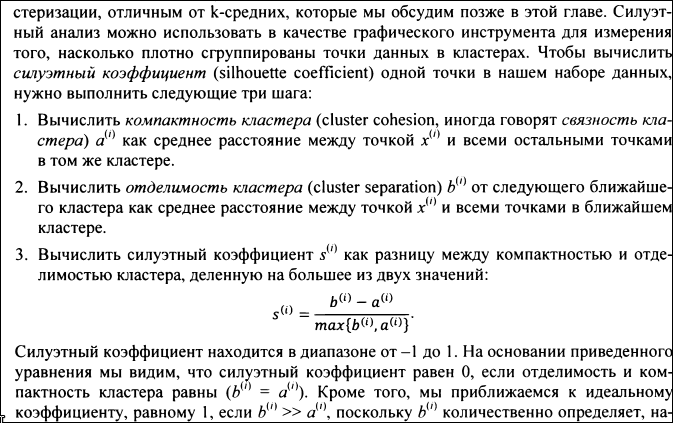

# Анализ текстов, NLP  
/home/nomad/Downloads/mainpy/machine-learning-book/ch08/ch08.ipynb

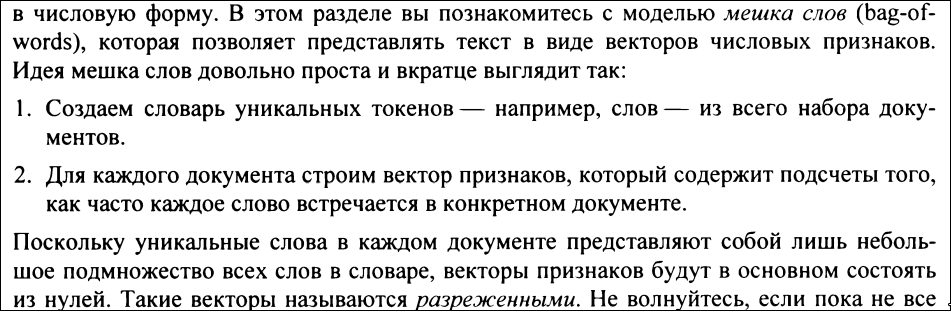

When we are analyzing text data, we often encounter words that occur across multiple documents from both classes. Those frequently occurring words typically don't contain useful or discriminatory information. In this subsection, we will learn about a useful technique called term frequency-inverse document frequency (tf-idf) that can be used to downweigh those frequently occurring words in the feature vectors. The tf-idf can be defined as the product of the term frequency and the inverse document frequency:

$$\text{tf-idf}(t,d)=\text{tf (t,d)}\times \text{idf}(t,d)$$

Here the tf(t, d) is the term frequency that we introduced in the previous section,
and the inverse document frequency *idf(t, d)* can be calculated as:

$$\text{idf}(t,d) = \text{log}\frac{n_d}{1+\text{df}(d, t)},$$

where $n_d$ is the total number of documents, and *df(d, t)* is the number of documents *d* that contain the term *t*. Note that adding the constant 1 to the denominator is optional and serves the purpose of assigning a non-zero value to terms that occur in all training examples; the log is used to ensure that low document frequencies are not given too much weight.

Scikit-learn implements yet another transformer, the `TfidfTransformer`, that takes the raw term frequencies from `CountVectorizer` as input and transforms them into tf-idfs:

$$\text{idf} (t,d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}$$

The tf-idf equation that was implemented in scikit-learn is as follows:

$$\text{tf-idf}(t,d) = \text{tf}(t,d) \times (\text{idf}(t,d)+1)$$

While it is also more typical to normalize the raw term frequencies before calculating the tf-idfs, the `TfidfTransformer` normalizes the tf-idfs directly.

By default (`norm='l2'`), scikit-learn's TfidfTransformer applies the L2-normalization, which returns a vector of length 1 by dividing an un-normalized feature vector *v* by its L2-norm:

$$v_{\text{norm}} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v_{1}^{2} + v_{2}^{2} + \dots + v_{n}^{2}}} = \frac{v}{\big (\sum_{i=1}^{n} v_{i}^{2}\big)^\frac{1}{2}}$$

To make sure that we understand how `TfidfTransformer` works, let us walk through an example and calculate the tf-idf of the word "is" in the 3rd document.

The word "is" has a term frequency of 3 (tf = 3) in document 3 ($d_3$), and the document frequency of this term is 3 since the term "is" occurs in all three documents (df = 3). Thus, we can calculate the idf as follows:

$$\text{idf}("is", d_3) = log \frac{1+3}{1+3} = 0$$

Now in order to calculate the tf-idf, we simply need to add 1 to the inverse document frequency and multiply it by the term frequency:

$$\text{tf-idf}("is", d_3)= 3 \times (0+1) = 3$$

Однако лемматизация является
более сложной и дорогостоящей операцией в вычислительном отношении по сравнению со стеммингом, и на практике было замечено, что переход от стемминга
к лемматизации почти не повышает эффективность классификаци

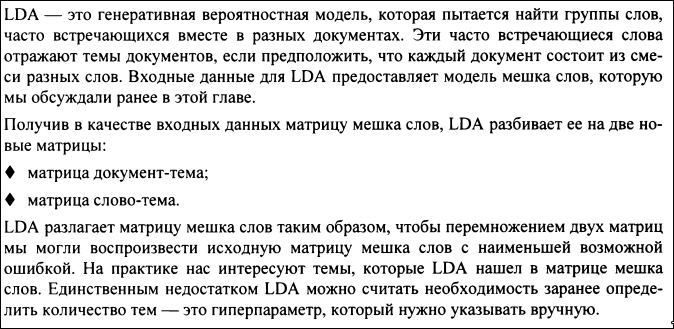

# Глава 11, построение нейронки  


In [45]:
from IPython.display import Image
%matplotlib inline

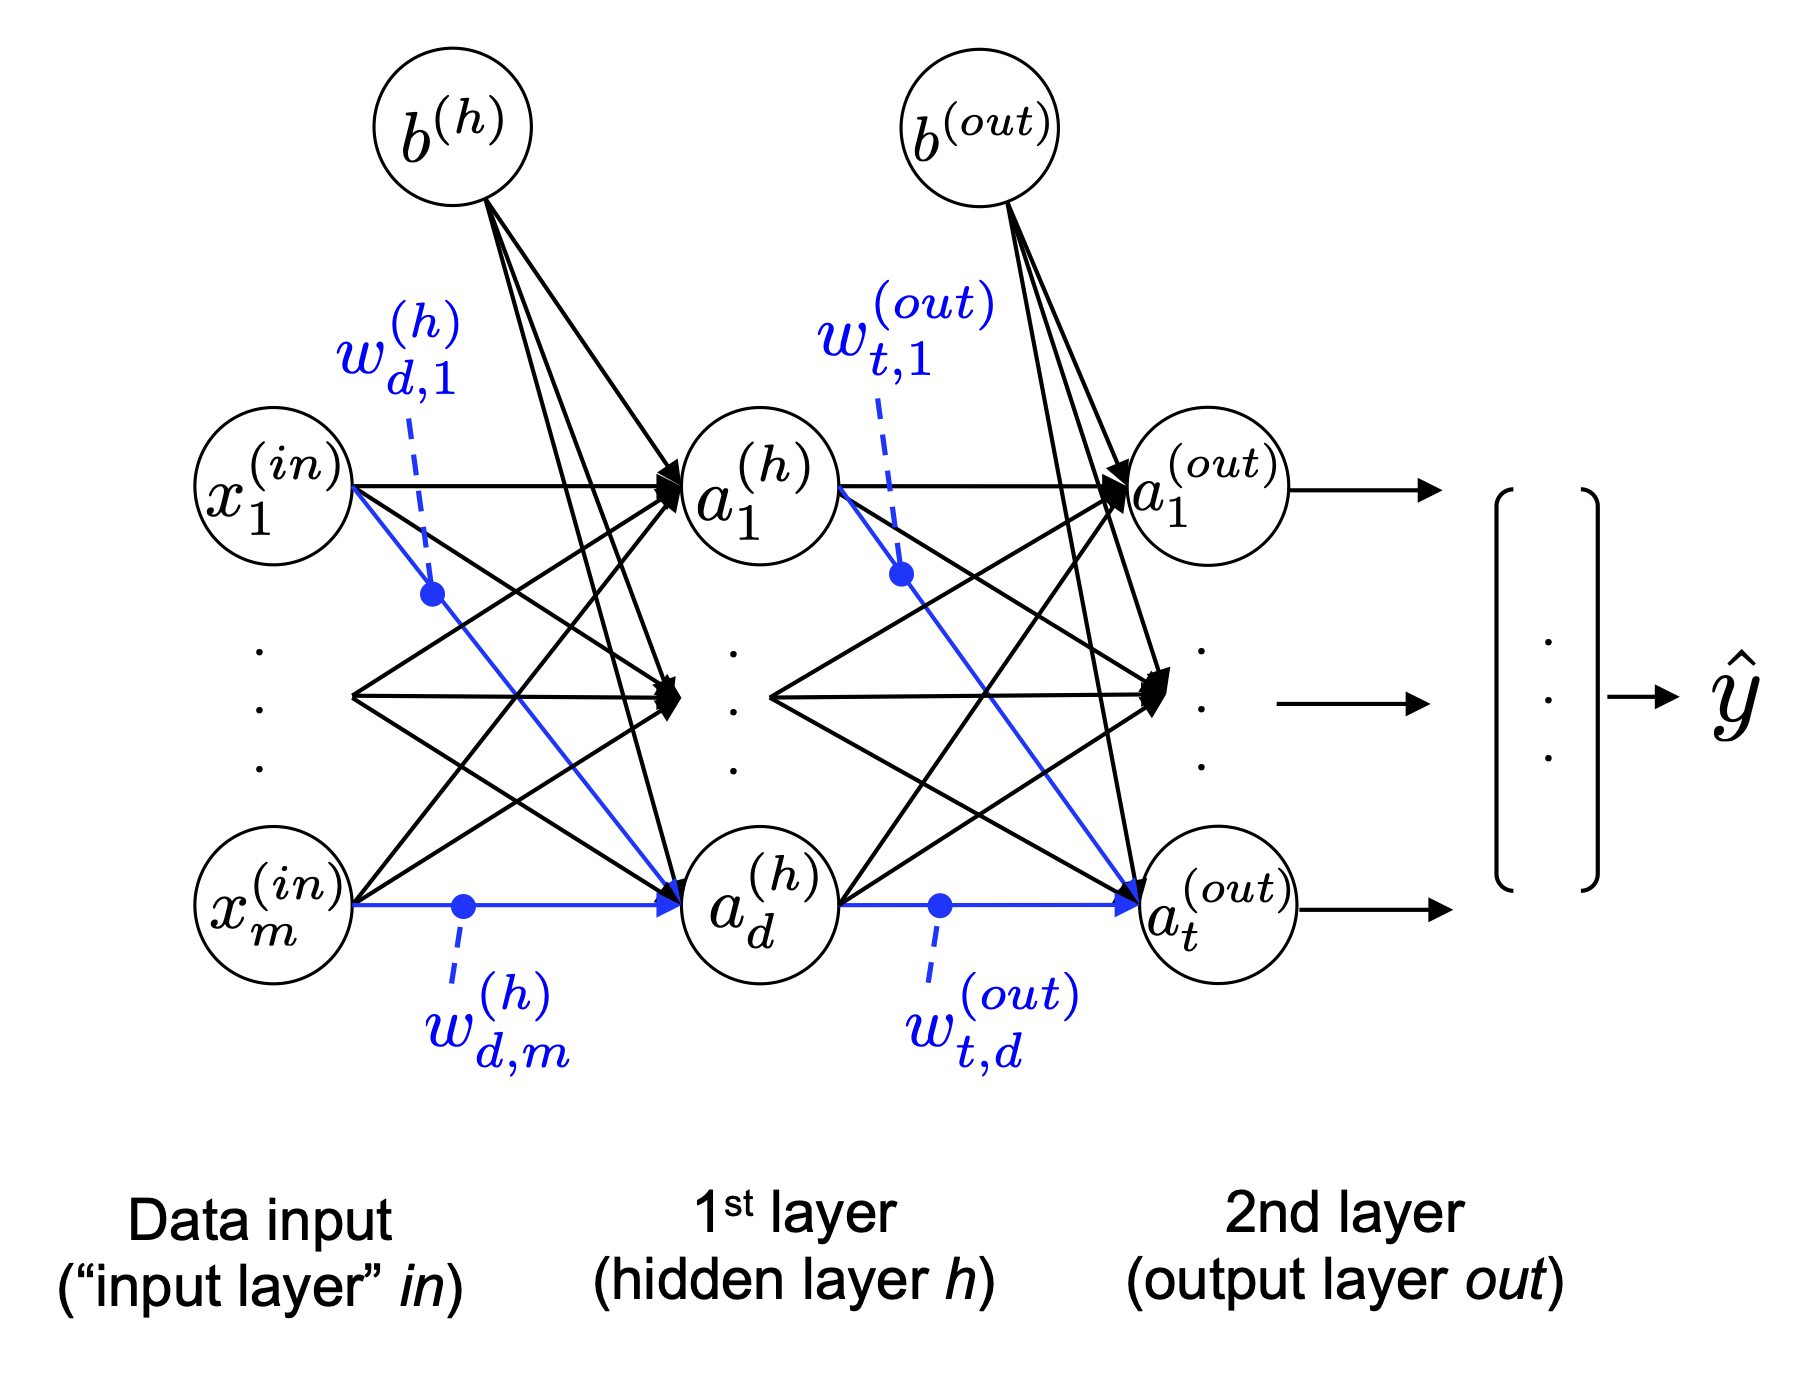

In [46]:
Image(filename='11_02.png', width=600)

In [90]:
def sigma(z):
    return 1. / (1 + np.exp(-z))

def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1

    return ary

class NeuralNetMLP:
    def __init__(self, n_features, n_hidden, n_classes, random_seed=123, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.rng = np.random.RandomState(random_seed)
        self.n_features = n_features
        self.n_cl = n_classes
        self.n_hidden = n_hidden
        self.weights_h = self.rng.normal(loc=0.0, scale =0.1, size=(self.n_hidden, self.n_features))
        self.bias_h = np.zeros(self.n_hidden)
        self.weights_out = self.rng.normal(loc = 0.0, scale=0.1, size=(self.n_cl, self.n_hidden))
        self.bias_out = np.zeros(self.n_cl)

    def forward(self, x):
        z_h = np.dot(x, self.weights_h.T) + self.bias_h
        a_h = sigma(z_h)
        z_out = np.dot(a_h, self.weights_out.T) + self.bias_out
        a_out = sigma(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):
        y = int_to_onehot(y, self.n_cl)
        #out
        d_L_d_a_out = -2. * (y - a_out)/y.shape[0]
        d_a_out_d_z_out = a_out * (1. - a_out)
        d_l_d_z_out = d_L_d_a_out * d_a_out_d_z_out
        d_L_d_w_out = np.dot((d_l_d_z_out).T, a_h)
        d_L_d_b_out = np.sum(d_l_d_z_out, axis=0)

        #hidden
        d_z_out_d_a_h = self.weights_out
        d_a_h_d_z_h = a_h * (1. - a_h)
        d_l_d_a_h = np.dot((d_l_d_z_out), d_z_out_d_a_h)
        d_L_d_w_h = np.dot((d_l_d_a_h * d_a_h_d_z_h).T, x)
        d_L_d_b_h = np.sum(d_l_d_a_h * d_a_h_d_z_h, axis=0)
        return (d_L_d_w_out, d_L_d_b_out, d_L_d_w_h, d_L_d_b_h)

    def partial_fit(self, x, y):
        a_h, a_out = self.forward(x)
        d_L_d_w_out, d_L_d_b_out, d_L_d_w_h, d_L_d_b_h = self.backward(x, a_h, a_out, y)
        self.weights_h -= self.learning_rate * d_L_d_w_h
        self.bias_h -= self.learning_rate * d_L_d_b_h
        self.weights_out -= self.learning_rate * d_L_d_w_out
        self.bias_out -= self.learning_rate * d_L_d_b_out
        return self

    def _mini_batch_generator(self, X, Y, size_batch):

        idx = np.arange(X.shape[0])
        np.random.shuffle(idx)

        for i in range(0, idx.shape[0] - size_batch + 1, size_batch):
            idxi = idx[i:i + size_batch]
            yield X[idxi], Y[idxi]



    def minibatch_fit(self, X, Y, n_epoch, size_batch = 32):
        for _ in range(n_epoch):
            minibatch_gen = self._mini_batch_generator(X, Y, size_batch)
            for x, y in minibatch_gen:
                self.partial_fit(x, y)

        return self

In [52]:
from sklearn.datasets import fetch_openml


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values
X = ((X / 255.) - .5) * 2

In [53]:
from sklearn.model_selection import train_test_split


X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=10000, random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=5000, random_state=123, stratify=y_temp)


# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [91]:
model = NeuralNetMLP(n_features=28*28,
                     n_hidden=50,
                     n_classes=10)

In [83]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)


_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)

In [84]:
print(f'Initial validation MSE: {mse:.1f}')
print(f'Initial validation accuracy: {acc*100:.1f}%')

Initial validation MSE: 0.3
Initial validation accuracy: 9.4%


In [ ]:
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = nnet._mini_batch_generator(X, y, minibatch_size)

    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)

        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()

        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

In [92]:
model.minibatch_fit(X_train, y_train, n_epoch=50, size_batch=32)

In [93]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)


_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)

In [94]:
print(f'Initial validation MSE: {mse:.1f}')
print(f'Initial validation accuracy: {acc*100:.1f}%')

Initial validation MSE: 0.0
Initial validation accuracy: 96.0%


In [106]:
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]

_, probas = model.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)

misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels1 = y_test_subset[y_test_subset != test_pred][:25]

In [107]:
classified_images = X_test_subset[y_test_subset == test_pred][:25]
classified_labels = test_pred[y_test_subset == test_pred][:25]
correct_labels2 = y_test_subset[y_test_subset == test_pred][:25]

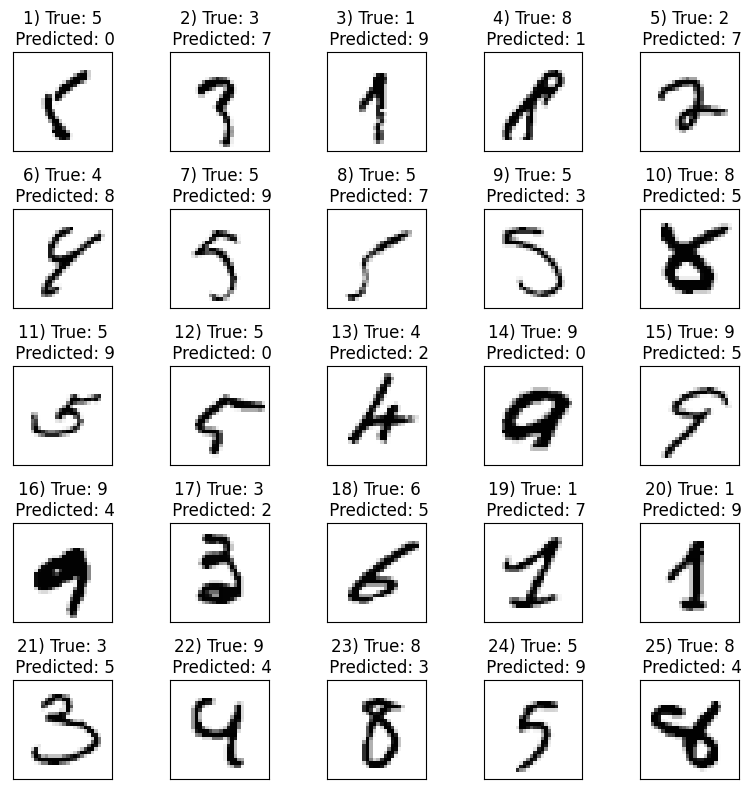

In [108]:
fig, ax = plt.subplots(nrows=5, ncols=5,
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels1[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_09.png', dpi=300)
plt.show()

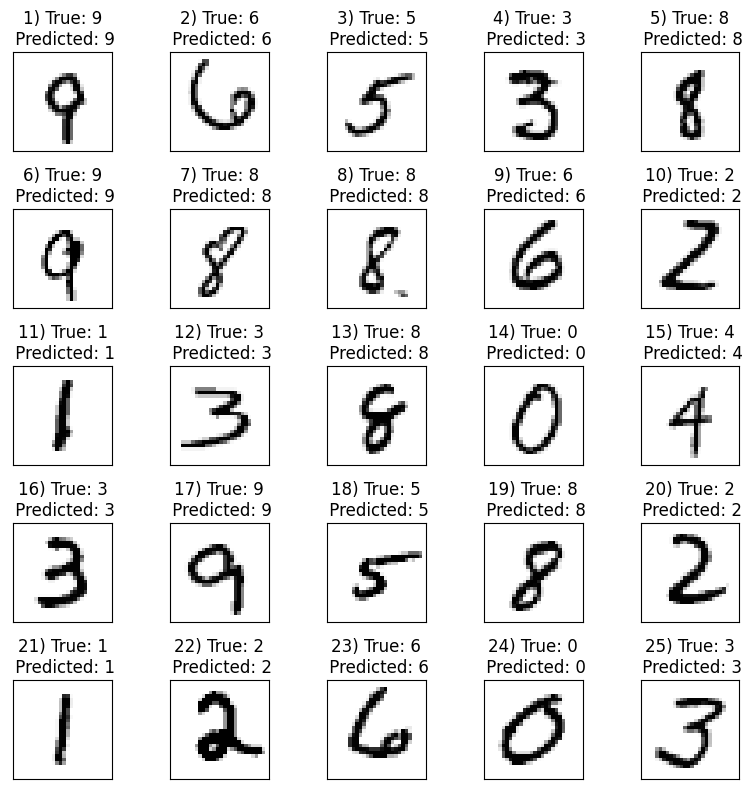

In [109]:
fig, ax = plt.subplots(nrows=5, ncols=5,
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = classified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels2[i]}\n'
                    f' Predicted: {classified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_09.png', dpi=300)
plt.show()